# U.S. Bancorp
Last update: 10 Oct 2021  
annual report: 2020  
share price data from: 9-26-2021  

## Abstract
This notebook was developed to use as a template to analyze dividend paying companies as potential investments. This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  

## Introduction
[U.S. Bancorp](https://ir.usbank.com/), a financial services holding company, provides various financial services
in the United States. It operates in Corporate and Commercial Banking, Consumer and Business Banking, Wealth Management and Investment Services, Payment Services, and Treasury and Corporate Support segments.

Sector(s): Financial Services  
Industry: Banks-Regional  
Earnings Date: Oct 14, 2021  
Ex-Dividend Date: Sep 29, 2021  
  
## Bottom line up front
Recommendation: Buy - Follow the link to the [Conclusion](#section11).

## Company description
[U.S. Bancorp](https://en.wikipedia.org/wiki/U.S._Bancorp) is an American bank holding company based in Minneapolis, Minnesota, and incorporated in Delaware. It is the parent company of U.S. Bank National Association, and is the fifth largest banking institution in the United States. The company provides banking, investment, mortgage, trust, and payment services products to individuals, businesses, governmental entities, and other financial institutions. It has 3,106 branches and 4,842 automated teller machines, primarily in the Western and Midwestern United States. It is ranked 117th on the Fortune 500, and it is considered a systemically important bank by the Financial Stability Board. The company also owns Elavon, a processor of credit card transactions for merchants, and Elan Financial Services, a credit card issuer that issues credit card products on behalf of small credit unions and banks across the U.S.

**Revision history:**  
- 10/9/2021: Copied from FRT notebook
- 12/7/2021: Updates for some bank specific items.  Current assets are total assets with goodwill and intangibles removed. Current liabilities include long term debt. Exploring removing deposits from current liabilities.  

## Analysis
The following sections of this notebook contain the financial analysis for the company.  

**Contents** <a id="section0"></a>  

1. [Quick look](#section1)
2. [Blank](#section2)
3. [Load financial statement data](#section3)
4. [NACI stock selection guide analysis](#section4)
5. [Format financial statements data](#section5)
6. [Discounted cash flow analysis, baseline](#section6)
7. [DCF Scenarios](#section7)
8. [Dividend Discount Model](#section8)
9. [Value analysis](#section9)
10. [Peer analysis](#section10) 
11. [Conclusion](#section11)
12. [Notes](#section12)
13. [References](#section13)
14. [Additional plots](#section14)

In [226]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## 1) Quick look <a id="section1"></a>
This section is completed first since the effort involved is much less compared to the other analysis sections in this notebook.  Some of the data looked at in this section is also available from the Fidelity company report.    

**Update**  
Think about streamlining the quick look to the following:  
- examining trends in revenue, earnings, debt and dividends
- news
- quarterly results
- Average daily volume
- Dividend yield

D/E and payout ratio don't seem to offer much value as a quick look when the data is from yahoo, a deeper dive is needed. 

**Current news**  
A review of the financial news sites from [yahoo](https://finance.yahoo.com/quote/USB?p=USB&.tsrc=fin-srch) and [google](https://www.google.com/finance/quote/USB:NYSE) did not reveal any news items to be concerned about.

**Review quarterly results**  
Since this analysis mainly looks at the annual reports, a review of the quarterly reports and the most recent 12 months is needed to see if the recent quarterly trends match the yearly trends.
- [yahoo finance](https://finance.yahoo.com/quote/USB/financials?p=USB) shows TTM Total Revenue is down from 2020, TTM Pretax Income is up from 2020.  
- The Compustat Company Research from Fidelity (from Sep. 29, 2021) shows quarterly revenue down compared to 2020.

**Average daily volume**  
The average daily volume in the stock market needs to be high enough to be liquid and should be over 1 million.  
Average daily volume: 5,333,353

**Dividend yield**  
Looking for a dividend yield between 2% to 6%.

In [227]:
# data from yahoo finance, on 9-26-2021
share_price = 61.85
dividend = 1.84 # Forward Dividend
print('dividend yield: {:.1f} %'.format(dividend/share_price*100))

dividend yield: 3.0 %


**Debt to equity ratio**  
The debt to equity ratio shows the proportion of equity and debt a company is using to finance its assets and signals the extent to which shareholder's equity can fulfill obligations to creditors, in the event of a business decline.

The debt to equity ratio compares a company’s total liabilities to its shareholder equity and can be used to evaluate how much leverage a company is using. Higher-leverage ratios tend to indicate a company with higher risk to shareholders. However, the D/E ratio is difficult to compare across industry groups where ideal amounts of debt will vary. Investors will often modify the D/E ratio to focus on long-term debt only because the risks associated with long-term liabilities are different than short-term debt and payables.

A good debt to equity ratio is around 1 to 1.5. However, the ideal debt to equity ratio will vary depending on the industry because some industries use more debt financing than others.  Here I'm looking for a value less than 2.

In [228]:
# data from yahoo finance, on 10-10-2021
debt = 41297000 # Long term Debt
equity = 53095000 # Stockholders' Equity
print('debt to equity ratio: {:.2f}'.format(debt/equity))

debt to equity ratio: 0.78


The Fidelity report gives the Total Debt to Equity: 193.9x  
For a financial company, the D/E metric is not used, later total liabilities less deposits divided by net operating profit is examined. 

**Dividend Payout Ratio Using Earnings**  
The Dividend Payout Ratio (DPR) is the amount of dividends paid to shareholders in relation to the total amount of net income the company generates. In other words, the dividend payout ratio measures the percentage of net income that is distributed to shareholders in the form of dividends.

$\text{DPR} = \frac {\text{Total dividends}} {\text{Net income}}$  

For financially strong companies in these industries, a good dividend payout ratio is less than 75% of their earnings. However, companies in fast-growing sectors or those with more volatile cash flows and weaker balance sheets need a lower dividend payout ratio. Ideally, it should be below 50%.

Therefore, a 25% dividend payout ratio shows that Company A is paying out 25% of its net income to shareholders. The remaining 75% of net income that is kept by the company for growth is called retained earnings.

In [229]:
dividend = 2852000 # Common Stock Dividend Paid
earnings = 4959000 # Net income
print('Dividend Payout Ratio Using Earnings: {:.2f}'.format(dividend/earnings))

Dividend Payout Ratio Using Earnings: 0.58


**Dividend Payout Ratio Using Cash Flow**  
Free Cash Flow Payout is simply Annual Dividend divided by Free Cash Flow.

$\text{FCFP} = \frac {\text{Dividends}} {\text{Free Cash Flow}}$  

It should be 70% or less. However, this does not apply to a REIT since they are required to pay out 95%.

https://seekingalpha.com/article/3148576-dividend-payout-vs-free-cash-flow-payout  
https://www.dividend-growth-stocks.com/2007/10/dividend-stock-and-etfcef-holdings.html  
https://dividendcultivator.com/2020/09/08/choose-your-dividend-payout-ratio-wisely-free-cash-flow-vs-income/  

In [230]:
# Dividend Payout Ratio Using Cash Flow
Cash_Flow = 3716000 # Cash, cash equivalents and restricted cash, end of year
print('Dividend Payout Ratio Using Cash Flow: {:.2f}'.format(dividend/Cash_Flow))

Dividend Payout Ratio Using Cash Flow: 0.77


The quick look metrics didn't seem too useful in weeding out undesirable financial companies.  

## 2) Blank <a id="section1"></a>
This section has been deleted. It was about [ValuePro](http://www.valuepro.net/index.shtml), an online intrinsic value calculator based on the discounted free cash to the firm model.  The calculations follow the method described in [2].  The results are useful as a quick look, but I've sometimes found the inputs to the model to be very different from what I would use and the calculated intrinsic value is suspect.

## 3) Load financial statement data <a id="section3"></a>
Data from consolidated financial statements and annual reports was collected and entered into a spreadsheet. All numerical data is converted from thousands or millions of dollars to dollars.  The stock share price history was obtained from yahoo and is included as a tab in the spreadsheet.  Other tabs in the spreadsheet are various worksheets. 

In [231]:
ticker = 'USB' # company ticker symbol
os.chdir('/home/jim/Documents/Dividend Investing/DCF data/')

file_name = ticker+'_Financials.xlsx'
df_financials = pd.read_excel(file_name,sheet_name='DCF data')
df_NAIC_financials = pd.read_excel(file_name,sheet_name='NAIC data')
df_metrics = pd.read_excel(file_name,sheet_name='metrics')
df_price_history = pd.read_excel(file_name,sheet_name='Historical Prices')

# change the working director back to the Jupyter folder
os.chdir('/home/jim/Documents/JupyterLab/Discount Cash Flow Analysis/')

In [232]:
# convert dates from string to datetime format
price_date_list = []
for i in range(len(df_price_history)):
    price_date_list.append(datetime.strptime(str(df_price_history['Date'][i]), '%Y-%m-%d'))

df_price_history.insert(0, 'datetime', price_date_list)  # insert a new column with datetime data
df_price_history.sort_values(by=['datetime'], inplace=True) # sort data frame by datetime

df_price_history.set_index('datetime',inplace=True)

#df_price_history.head()

## 4) NACI stock selection guide analysis <a id="section4"></a>
This analysis follows the NAIC stock selection guide (SSG) [1].  The SSG relates revenue growth, EPS and share price history and makes a prediction about the future share price.    

The National Association of Investors Clubs (NAIC) is a nonprofit organization dedicated to educating individual investors and investment clubs to become successful lifelong investors.  NAIC's Stock Selection Guide (SSG) is used in the following cells to analyze the company's growth and whether the stock is selling at a reasonable price.

The SSG was originally developed in the 1950s as a paper worksheet by the not-for-profit National Association of Investors Corporation (NAIC). The SSG aims to aid individual investors in the fundamental analysis and selection of common stocks by reviewing components of a company's growth, quality, and value.

In [233]:
#column names: fiscal years 
years_list = df_NAIC_financials.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

#line 0: revenue  
revenue = df_NAIC_financials.iloc[0].to_numpy()[1:].astype('float')[::-1]
#line 1: earnings per share
EPS = df_NAIC_financials.iloc[1].to_numpy()[1:].astype('float')[::-1]

**High and low price history for each year**  
From the daily price history obtained from yahoo finance, the high and low closing price for each is obtained and the data saved to the financial data frame as new columns.

In [234]:
fy_open = []
fy_close = []
fy_high = []
fy_low = []

for i in year_ended_list:
    start = i
    end = i + relativedelta(years=1)
    p1 = df_price_history.truncate(before=start, after=end)
    if len(p1) == 0:
        fy_open.append(np.nan)
        fy_close.append(np.nan)        
        fy_high.append(np.nan)
        fy_low.append(np.nan)
    else:
        fy_open.append(p1['Open'].iloc[0])
        fy_close.append(p1['Close'].iloc[-1])        
        fy_high.append(p1['Close'].max())
        fy_low.append(p1['Close'].min())

# convert from list to numpy array
fy_open = np.asarray(fy_open)
fy_close = np.asarray(fy_close)
fy_high = np.asarray(fy_high)
fy_low = np.asarray(fy_low)

**Plotting the data**  
The annual sales, EPS and the high and low share price is plotted on a semilog plot. A consistent percentage change in the data will plot on the semi-log chart as a straight line.

The stock price is plotted separately from the sales and earnings for clarity.


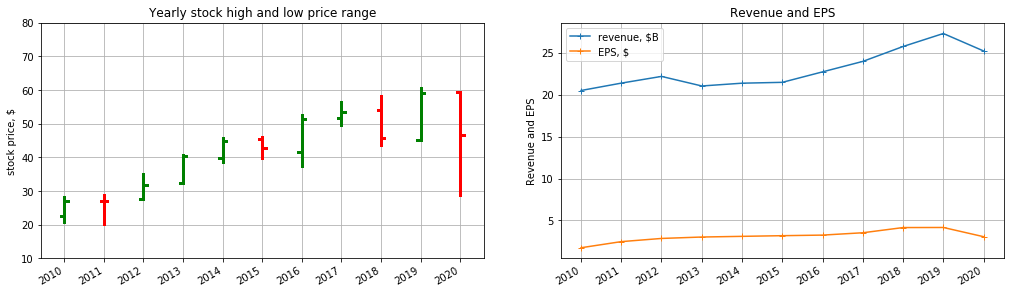

In [235]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# figsize() function to adjust the size
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
width = 3  # the width of the bars
#plt.bar(year_ended_list,fy_high-fy_low, width,bottom=fy_low,label='price')
j = 0
for i in year_ended_list:
    color = 'green'
    if fy_open[j] > fy_close[j]: color= 'red'
    # high/low lines
    plt.plot([i,i],[fy_low[j],fy_high[j]],color=color, linewidth=width)
    # open marker
    plt.plot([i,i-relativedelta(months=1)], [fy_open[j],fy_open[j]], color=color, linewidth=width)
    # close marker
    plt.plot([i,i+relativedelta(months=1)], [fy_close[j],fy_close[j]], color=color, linewidth=width)
    j += 1

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((10,80))
plt.title('Yearly stock high and low price range')
plt.ylabel('stock price, $')
#plt.legend()
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

plt.plot(year_ended_list,revenue/1e9,'+-',label='revenue, $B')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.yscale('log')
#plt.yticks([0.1,1,10,100,1000,10000],['0.1','1','10','100','1000','10000'])
#plt.ylim((0.1,1000))
plt.title('Revenue and EPS')
plt.ylabel('Revenue and EPS')
plt.legend()

plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()

**Observations:**  
Share price is trading in an upward trend over the years 2020 to 2019. Then in 2020 the effects of the pandemic impact revenue. Revenues are increasing, except for 2020 and earnings are increasing.

**Price earnings history**  
Section 3 of the SSG is the Price-Earnings history.  The following table is built from the high and low prices each year and the earnings per share. The high and low Price/Earnings ratios are calculated for each year and are listed in the columns labeled h-per and l-per.

In [236]:
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','high','low','eps',
    'h-per','l-per'))
for i in range(len(year_ended_list)):
    print('{:s}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}'.format(year_ended_list[i].strftime("%Y"),
        fy_high[i], fy_low[i],EPS[i],
        fy_high[i]/EPS[i],
        fy_low[i]/EPS[i]))

year      high       low       eps     h-per     l-per
2010     28.26     20.71      1.74     16.24     11.90
2011     28.70     20.31      2.47     11.62      8.22
2012     35.19     27.57      2.85     12.35      9.67
2013     40.60     32.27      3.02     13.44     10.69
2014     45.91     38.78      3.10     14.81     12.51
2015     46.02     39.76      3.18     14.47     12.50
2016     52.54     37.45      3.25     16.17     11.52
2017     56.41     49.69      3.53     15.98     14.08
2018     58.11     43.76      4.15     14.00     10.54
2019     60.68     45.70      4.16     14.59     10.99
2020     59.20     28.93      3.06     19.35      9.45


**Average high and P/E for select years**   
The average price to earning ratio based on high and low stock prices is calculated.

In [237]:
#Average high P/E for years 
pe_avg_high = (fy_high/EPS).mean()
print('average high P/E {:.2f}'.format(pe_avg_high))
#Average low P/E for years 
pe_avg_low = (fy_low/EPS).mean()
print('average low P/E {:.2f}'.format(pe_avg_low))

average high P/E 14.82
average low P/E 11.10


**Estimate future EPS**  
A least squares fit is used to get the slope of the EPS data points.

In [238]:
# get linear fit for eps
y = EPS
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('EPS slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

EPS slope: 0.17


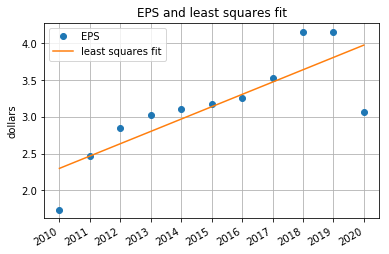

In [239]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars')

ax1.plot(year_ended_list,EPS, 'o',label='EPS')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('EPS and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the EPS point at five years in the future.

In [240]:
# estimated eps in 5 years
eps_5yr_est = m*(x[-1]+5) + c
print('estimated EPS in 5 years: {:.1f}'.format(eps_5yr_est))

estimated EPS in 5 years: 4.8


Using the high and low price to earning ratio from above and the projected EPS, calculate the range of stock price in five years.

In [241]:
#eps_5yr_est = 5  # user inputed value
print('estimated price range in 5 years: {:.2f} to {:.2f}'.format(eps_5yr_est*pe_avg_low,eps_5yr_est*pe_avg_high))

estimated price range in 5 years: 53.41 to 71.32


This is the estimated price range of the stock based on projected EPS and is a guide for what the stock price might be if conditions remain the same. The current stock price of \\$61.59 falls within this range, indicating that the stock is trading at a fair value. 

## 5) Format financial statements data <a id="section5"></a>
Generate a new data frame that holds the financial data needed for the Discounted cash flow (DCF) model.  Data from financial statements is copied into a spreadsheet which contains the data used in the analysis.  The data in the DCF_data tab is in a consistent format for ease of use by this notebook.  Standard names are used for the rows and columns.

In [242]:
#column names: fiscal years 
fy_data = df_financials.columns[1:].values.astype('datetime64[Y]')-1970
#line 0: Total revenue  
revenue_data = df_financials.iloc[0].to_numpy()[1:].astype('float')
#line 1: Cost of goods sold
Cost_of_goods_sold_data = df_financials.iloc[1].to_numpy()[1:].astype('float')
#line 2: General and administrative
General_and_administrative_data = df_financials.iloc[2].to_numpy()[1:].astype('float')
#line 3: Research and development
Research_and_development_data = df_financials.iloc[3].to_numpy()[1:].astype('float')
#line 4: Depreciation and amortization
Depreciation_and_amortization_data = df_financials.iloc[4].to_numpy()[1:].astype('float')
#line 5: Investment
Investment_data = df_financials.iloc[5].to_numpy()[1:].astype('float')
# line 6: Income before income taxes
Income_before_income_taxes_data = df_financials.iloc[6].to_numpy()[1:].astype('float')
# line 7: Income tax
Income_tax_data = df_financials.iloc[7].to_numpy()[1:].astype('float')
# line 8: Accounts receivable
Accounts_receivable_data = df_financials.iloc[8].to_numpy()[1:].astype('float')
# line 9: Inventories
Inventories_data = df_financials.iloc[9].to_numpy()[1:].astype('float')
# line 10: Accounts payable
Accounts_payable_data = df_financials.iloc[10].to_numpy()[1:].astype('float')
# line 11: Current assets
Current_assets_data = df_financials.iloc[11].to_numpy()[1:].astype('float')
# line 12: Current liabilities
Current_liabilities_data = df_financials.iloc[12].to_numpy()[1:].astype('float')
# line 13: Long term debt
Long_term_debt_data = df_financials.iloc[13].to_numpy()[1:].astype('float')
# line 14: Shares outstanding
Shares_outstanding_data = df_financials.iloc[14].to_numpy()[1:].astype('float')

In [243]:
# make a new data frame to store selected financial data
df_dcf_data = pd.DataFrame(data={
    'FY':fy_data[::-1],
    'revenue':revenue_data[::-1],
    'cost_of_goods_sold':Cost_of_goods_sold_data[::-1],
    'general_and_administrative':General_and_administrative_data[::-1],
    'research_and_development':Research_and_development_data[::-1],
    'depreciation':Depreciation_and_amortization_data[::-1],
    'investment':Investment_data[::-1],
    'income_before_income_taxes':Income_before_income_taxes_data[::-1],
    'income_tax':Income_tax_data[::-1],
    'accounts_receivable':Accounts_receivable_data[::-1],
    'inventories':Inventories_data[::-1],
    'accounts_payable':Accounts_payable_data[::-1], 
    'current_assets':Current_assets_data[::-1],
    'current_liabilities':Current_liabilities_data[::-1],
    'long_term_debt':Long_term_debt_data[::-1],
    'shares_outstanding':Shares_outstanding_data[::-1]
    })

#df_dcf_data

## 6) Discounted cash flow analysis, baseline <a id="section6"></a>
DCF is a valuation method used to estimate the value of an investment based on its expected future cash flows. DCF analysis attempts to figure out the value of an investment today, based on projections of how much money it will generate in the future. In finance, DCF analysis is a method of valuing a security, project, company, or asset using the concepts of the time value of money. The DCF method used in this notebook follows [2].  

The value of any financial investment equals the present value of the expected future cash flows, discounted for risk and timing of these cash flows. The DCF method to value stocks is a four step process.  
1. Develop a set of future free cash flows for the corporation based on revenue growth, net operating profit margin, income tax rate and fix and working capital requirements.
2. Estimate the discount rate for the cash flows based on expected timing and risk.
3. Discount the cash flows and total them to calculate the value for the corporation as a whole.
4. Subtract the debt, preferred stock value and other claims and divide by the number of shares outstanding to get the intrinsic value.

Sections
- [Revenue growth rate](#section6-1) 
- [Net operating profit margin](#section6-2)
- [Tax rate](#section6-3)
- [Depreciation Rate](#section6-4)
- [Investment Rate](#section6-5)
- [Working Capital Rate](#section6-6)
- [Current Assets](#section6-7)
- [Current Liabilities](#section6-8)
- [Value of Debt Outstanding](#section6-9)
- [Current stock price](#section6-10)
- [Shares outstanding](#section6-11)
- [10 year treasury bond yield](#section6-12)
- [Bond yield spread to treasury](#section6-13)
- [Preferred stock yield](#section6-14)
- [Equity risk premium](#section6-15)
- [Company specific beta](#section6-16)
- [DCF model inputs](#section6-17)
- [Future cash flows](#section6-18)

### Revenue growth rate <a id="section6-1"></a>
The revenue growth rate (also sometimes called net sales) of the corporation plus any other revenues associated with the main operations of the business. It does not include dividends, interest income or non-operating income. Historic revenue data is obtained from consolidated income statements. The year over year change in revenue is calculated and converted to a percent, then an average revenue growth rate is calculated. 

**Adjustments for a financial company**  
Total revenue comes from the total interest and dividend income line on the income statement.  The calculation of operating income is more inclusive for a financial company than for an industrial or high tech company.  For financial companies, operating revenue includes all normal revenue items plus interest income, dividends received and other investment income.  

$\text{Total revenue} = \text{Total interest and dividend income} +\text{Total non-interest income}$

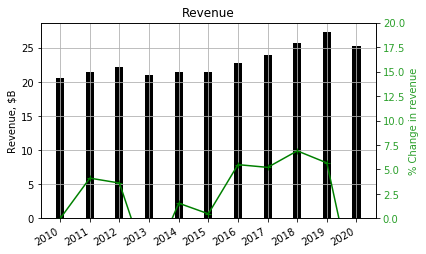

In [244]:
# calculate the percent change in revenue
pcr = np.zeros(len(df_dcf_data['revenue'].to_numpy())) # percent change in revenue
for i in range(len(df_dcf_data['revenue'].to_numpy()[0:-1])):
    pcr[i+1] = ((df_dcf_data['revenue'].to_numpy()[i+1] - df_dcf_data['revenue'].to_numpy()[i])/
                df_dcf_data['revenue'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Revenue, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['revenue']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcr,'+-g')
    
ax2.set_ylabel('% Change in revenue',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue')
plt.show()

**Observation:**  
In 2020 the revenue from loans was \\$12.018 billion, down from \\$14.099 billion in 2019. The average revenue growth rate over the period is 1.69%. 

The Company’s major lines of business are Corporate and Commercial Banking, Consumer and Business Banking, Wealth Management and Investment Services, Payment Services, and Treasury and Corporate Support.
- Corporate and Commercial Banking contributed 31.4 percent of the Company’s net income in 2020, a decrease of 7.2 percent, compared with 2019.
- Consumer and Business Banking contributed 56.1 percent of the Company’s net income in 2020, an increase of 18.0 percent, compared with 2019.
- Wealth Management and Investment Services contributed 14.4 percent of the Company’s net income in 2020, a decrease of 19.9 percent, compared with 2019.
- Payment Services contributed 25.6 percent of the Company’s net income in 2020, a decrease of 12.7 percent, compared with 2019.
- Treasury and Corporate Support recorded a net loss of \\$1.4 billion in 2020, a decrease of \\$1.9 billion, compared with 2019.


In [245]:
rgr_avg = pcr[2:].mean()/100
print('average revenue growth rate: {:.2f}%'.format(rgr_avg*100))

average revenue growth rate: 1.69%


### Net operating profit margin <a id="section6-2"></a>
Net Operating Profit should reflect the future revenue generating ability and expense requirements of the operating business that comprise the ongoing operations of the company.

$\text{NOPM} = \frac{\text{Revenue} - \text{Expenses}}{\text{Revenue}}$  
 
$\text{Expenses} = \text{Cost of Goods Sold (CGS)} + \text{General and Administrative (G&A)} + \text{Research and Development (R&D)}$

General and Administrative (G&A) is also called Sales, General and Administrative (SG&A)

**Adjustments for a financial company**  
- $\text{Cost of Goods Sold (CGS)} = \text{Total interest expense} + \text{Total non-interest expense}$  
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

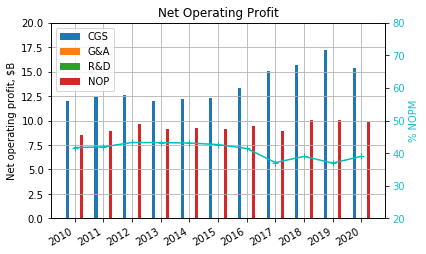

In [246]:
# NOP = (Revenue - Expenses)
nop = (df_dcf_data['revenue'].to_numpy() - \
    (df_dcf_data['cost_of_goods_sold'].to_numpy() + \
    df_dcf_data['general_and_administrative'].to_numpy() + \
    df_dcf_data['research_and_development'].to_numpy()) )

# net operating profit margin as percent of revenue
nopm = nop/df_dcf_data['revenue'].to_numpy()

# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))
    
width = 40  # the width of the bars
    
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Net operating profit, \\$B')

ax1.bar(x1_bar_position,df_dcf_data['cost_of_goods_sold'].to_numpy()/1e9, width,label='CGS')
ax1.bar(x2_bar_position,df_dcf_data['general_and_administrative'].to_numpy()/1e9, width,label='G&A')
ax1.bar(x3_bar_position,df_dcf_data['research_and_development'].to_numpy()/1e9, width,label='R&D')
ax1.bar(x4_bar_position,nop/1e9, width,label='NOP')

ax1.tick_params(axis='y')
ax1.set_ylim((0,20))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:cyan'

ax2.plot(df_dcf_data['FY'],nopm*100,'+-c')
    
ax2.set_ylabel('% NOPM',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((20,80))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Net Operating Profit')
plt.show()

**Observation**  
The NOPM has shown some variation over the years. From 2010 to 2016, the NOPM was consistent. Starting in 2017, the NOPM had declined a bit. In 2019 the total interest expense was higher. In 2020, provision for credit losses increased to \\$3.806 from \\$1.504 billion. The average NOPM for the past five years is 39%.

In [247]:
#Average net operating profit margin
nopm_avg = nopm[-5:].mean()
print('average net operating profit margin: {:.2f}%'.format(nopm_avg*100))

average net operating profit margin: 38.72%


### Tax rate <a id="section6-3"></a>
Tax payments are taken from the consolidated income statement, provision for income taxes.  The effect of taxes on profits is accounted for. 

$\text{Tax rate} = \frac{\text{Income taxes}}{\text{Income before income taxes}}$

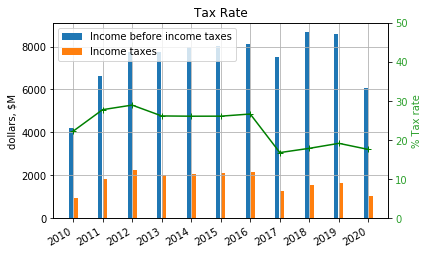

In [248]:
# plot as Grouped bar chart with labels on right and tax rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=1))
    x2_bar_position.append(i+relativedelta(months=1))

# calculate tax rate
tax_rate = df_dcf_data['income_tax']/df_dcf_data['income_before_income_taxes']

width = 50  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$M')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['income_before_income_taxes']/1e6, width,
    label='Income before income taxes')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['income_tax']/1e6, width,
    label='Income taxes')

ax1.tick_params(axis='y')
#ax1.set_ylim((-2e3,2e3))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],tax_rate * 100,'+-g')
    
ax2.set_ylabel('% Tax rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Tax Rate')
plt.show()

**Observations**:  
The income taxes rate from 2017 to 2020 was lower than previous years. The average tax rate is calculated below.  

In [249]:
# Average tax rate
tax_rate_avg = tax_rate.mean()
print('average tax rate: {:.2f}%'.format(tax_rate_avg*100))

average tax rate: 23.23%


### Depreciation Rate <a id="section6-4"></a>
The depreciation rate is used to project the future net investment cash flows.  The effect is to reduce the amount of FCFF. Depreciation amounts are from the Consolidated Statement of Cash Flows, Depreciation and Amortization.  

$\text{Depreciation Rate}=\frac{\text{Depreciation and Amortization}}{\text{Revenues}}$

Depreciation is the write off or expensing of a percentage of the historical cost of an asset over the asset's useful life.  Property, plant and equipment (PP&E) are long term or non current assets owned or controlled by the company and used to manufacture and or sell the company's products.  The balance sheet typically shows all categories of PP&E grouped together, net of accumulated depreciation.  Depreciation represents wear and tear on an asset or the fact that an asset gets used up over time.  Companies record depreciation expense in the income statement every year for all depreciable assets in service or used by the company during the year.  The difference between GAAP and Tax Accounting methods is handled through deferred taxes.

Amortization is the write off or expensing of the cost of a financial instrument or an intangible asset over the shorter of its useful life or legal life.  Amortization is similar to depreciation and reflects the declining useful life and value of the intangible asset over time.  Companies in research and development intensive fields typically have many patents.  Such industries include high technology, pharmaceuticals and chemicals. 

Depreciation and amortization amounts are included under the label depreciation.

**Adjustments for a financial company**  
New investment and Depreciation: Property, plant and equipment expenditures and depreciation charges are significantly lower for a financial company. Financial companies invest very little in the way of plant, property and equipment.  However, software, risk management systems and acquisitions of other businesses, need to be included.

Depreciation and amortization of premises and equipment is from Consolidated Statements of Cash Flows. Amortization of intangibles is not included.

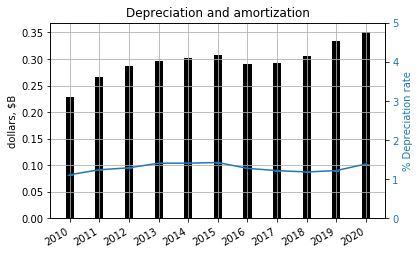

In [250]:
# depreciation rate
depreciation_rate = df_dcf_data['depreciation'] / df_dcf_data['revenue'].to_numpy()

# plot depreciation on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['depreciation']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],depreciation_rate*100,'+-')
    
ax2.set_ylabel('% Depreciation rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,5))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Depreciation and amortization')
plt.show()

**Observations**:  
The depreciation and amortization rate is low. PP&E is not identified as an expense.

In [251]:
# average depreciation rate
depreciation_rate_avg = depreciation_rate[2:].mean()
print('average depreciation rate: {:.2f}%'.format(depreciation_rate_avg*100))

average depreciation rate: 1.32%


### Investment Rate <a id="section6-5"></a>
Taken from Consolidated Statement of Cash Flows, Cash used for investing activities.  Net investment in the dollar amount needed to support the growth of the firm.  Included investments in properties, plant equipment in excess of the depreciation expenses associated with past investments.  Net investment decreases the amount of money available to the stockholders.  Investment in property, plant and equipment is necessary to both maintain service and sales and also to grow revenues and profits.  Investment amounts should include capital expenditures and research and development. 

$Ir=\frac {\text {Capital Expenditures}}{\text{Revenues}}$ 

For this company, the yearly investment amounts are taken from the Consolidated Statements of Cash Flows, 
Net Cash Used in Investing Activities.

**Adjustments for a financial company**  
Property, plant and equipment (PPE) expenditures are significantly lower for a financial company.  Financial companies invest very little in the way of PPE.  However, software, risk management systems and acquisitions of other businesses, need to be included.

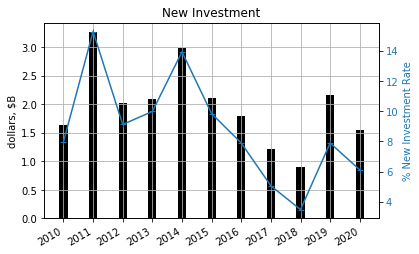

In [252]:
# investment rate
investment_rate = df_dcf_data['investment'] / df_dcf_data['revenue'].to_numpy()

# plot investment on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['investment']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],investment_rate*100,'+-')
    
ax2.set_ylabel('% New Investment Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('New Investment')
plt.show()

**Observations**:  
The financial statements do not break out purchases of premises, equipment or leased items. Investments by the bank are financial investments. New investments that could be depreciated or amortized are estimated by taking 10% of Net cash used in investing activities from the Consolidated Statements of Cash Flows. New investments should have some relationship to depreciation in the model, otherwise some of the future cash flows will be negative.  

In [253]:
# average investment rate
investment_rate_avg = investment_rate.mean()
print('average investment rate: {:.2f}%'.format(investment_rate_avg*100))

average investment rate: 8.78%


### Working Capital Rate <a id="section6-6"></a>
Working capital is needed to support the corporate sales effort of any company.  Often a company’s incremental change in net working capital either positive or negative is approximately proportional to its change in revenue.

$\text{Working capital} = \text{Accounts Receivable} + \text{Inventories} - \text{Accounts Payable}$  

Working capital is a company’s net investment in its accounts receivable and its inventories (cash outflows), minus its accounts payable (a cash inflow).  Working capital and taxes are cash outflows from the corporation that are not available to pay debts and stockholders.

**Adjustments for a financial company**  
Working capital supports manufacturing and service activities of nonfinancial companies.  For financial companies, their principal liabilities and assets are financial claims that take the place of working capital.  Because there is no differentiation between current and long term assets and liabilities for a financial company, we adjust working capital charges to zero.  A financial company generally invests all of its funds in other financial assets, which have characteristics of current assets rather than PP&E.  
$\text{Accounts Receivable} = 0$  
$\text{Inventories} = 0$  
$\text{Accounts Payable} = 0$  
$\text{working capital} = 0$ 

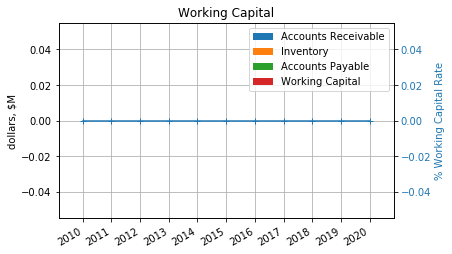

In [254]:
# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))

# calculate working capital rate
working_capital = (df_dcf_data['accounts_receivable'] + df_dcf_data['inventories']) - \
    df_dcf_data['accounts_payable']
working_capital_rate = working_capital / df_dcf_data['revenue']

width = 40  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$M')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['accounts_receivable']/1e9, width,\
    label='Accounts Receivable')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['inventories']/1e9, width, label='Inventory')

rects2 = ax1.bar(x3_bar_position,df_dcf_data['accounts_payable']/1e9, width, label='Accounts Payable')
rects2 = ax1.bar(x4_bar_position,working_capital/1e9, width, label='Working Capital')

ax1.tick_params(axis='y')
#ax1.set_ylim((-50,200))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],working_capital_rate * 100,'+-')
    
ax2.set_ylabel('% Working Capital Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,5))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Working Capital')
plt.show()

**Observations:**  
As stated above, the working capital is zero in this DCF model for a financial institution.

In [255]:
# average working capital rate
working_capital_rate_avg = 0 # working_capital_rate[-5:].mean()
print('average working capital rate: {:.2f}%'.format(working_capital_rate_avg*100))

average working capital rate: 0.00%


### Current assets <a id="section6-7"></a>
Total Current Assets from the most recent balance sheet statement of the company.  Current assets include inventory, cash and accounts receivables.

**Adjustments for a financial company**  
The balance sheets of most financial companies do not separate assets and liabilities into current and long term categories.  When calculating the short term assets take the total assets and subtract goodwill and intangible assets also subtract other assets of questionable value.  Subtract long term assets such as PP&E from total assets.  

$\text{Short term assets} = \text{Total assets} - \text{good will and others of questionable value} - \text{Premises and equipment}$

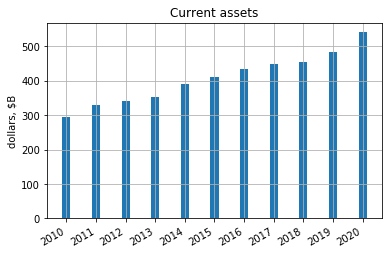

In [256]:
# plot Short Term Assets
width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_assets']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current assets')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

**Observations:**  
Current assets have been increasing every year.

In [257]:
sta = df_dcf_data['current_assets'].iloc[-1]
print('Current assets: ${:.2f}B'.format(sta/1e9))

Current assets: $541.12B


### Current liabilities <a id="section6-8"></a>
Total Current Liabilities from the most recent balance sheet consolidated statement.

**Adjustments for a financial company**  
A financial company's principal liabilities are deposits, Federal funds purchased, trading account liabilities, insurance policy and claims reserves, contract holder funds and short term borrowing. To be consistent with the treatment of interest and an operating expense for financial companies, include long term debt in the short term liability category.  

Deposits are included in liabilities.  This makes the ISV calculated result more in line with other intrinsic valuations.

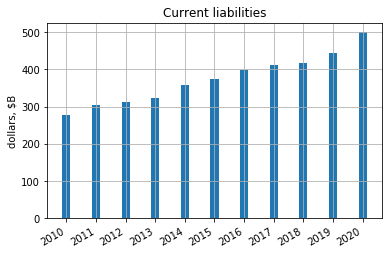

In [258]:
# plot Short Term Liabilities

width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_liabilities']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current liabilities')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

**Observations**:  
Current liabilities include long term debt. Exploring the idea of removing deposits from current liabilities.  Deposits have reserve amounts are regulated.  The idea is that deposits are like resources for the bank and used to generate income.  The DCF spreadsheet now includes a line for total deposits in the liabilities section.

With deposits included, 2020 current liabilities is \\$500B and without deposits \\$70B.

Total assets and total liabilities plotted later in this notebook are the totals from the financial statements without adjustments.

In [259]:
stl = df_dcf_data['current_liabilities'].iloc[-1]
print('Current liabilities: ${:.2f}B'.format(stl/1e9))

Current liabilities: $500.18B


### Value of Debt Outstanding <a id="section6-9"></a>
Amount of debt outstanding from the most recent balance sheet of the company.

**Adjustments for a financial company**  
As describe above, long term debt is included in current liabilities.

$\text{Long term debt} = 0$

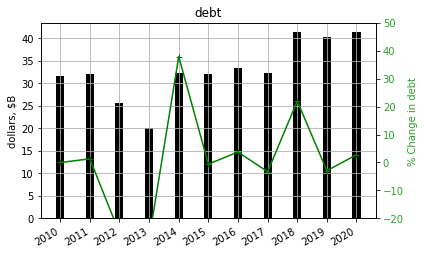

In [260]:
# calculate the percent change in debt, pcd
pcd = np.zeros(len(df_dcf_data['long_term_debt'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['long_term_debt'].to_numpy()[0:-1])):
    pcd[i+1] = ((df_dcf_data['long_term_debt'].to_numpy()[i+1] - df_dcf_data['long_term_debt'].to_numpy()[i])/
                df_dcf_data['long_term_debt'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['long_term_debt']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcd,'+-g')
    
ax2.set_ylabel('% Change in debt',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-20,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('debt')
plt.show()

In [261]:
dgr_avg = pcr[1:].mean()/100
print('average debt growth rate: {:.2f}%'.format(dgr_avg*100))

average debt growth rate: 1.94%


**Observations:**  
Plotted above is LT debt. As described above, the value of debt is set to zero in the model.

In [262]:
vod = 0 #df_dcf_data['long_term_debt'].iloc[-1]
print('Total long term debt and other: ${:.2f}B'.format(vod/1e9))

Total long term debt and other: $0.00B


### Current stock price <a id="section6-10"></a>
Most recent stock price for the [company](https://finance.yahoo.com/quote/T/?p=T).  The current stock price is used to calculate the market value of the firm. Use the market value when looking at market capitalization for common stock. 

In [263]:
csp = 61.59 # current stock price, $
print('current stock price: ${:,.2f}'.format(csp))

current stock price: $61.59


### Shares outstanding <a id="section6-11"></a>
The number of shares outstanding is used to calculate the intrinsic stock value.  

Authorized shares are the maximum number of shares a company is allowed to issue to investors, as laid out in its articles of incorporation. Outstanding shares are the actual shares issued or sold to investors from the available number of authorized shares.

In [264]:
so = df_dcf_data['shares_outstanding'].iloc[-1]               # shares outstanding
print('shares outstanding, basic: {:,.0f}'.format(so))

shares outstanding, basic: 1,509,000,000


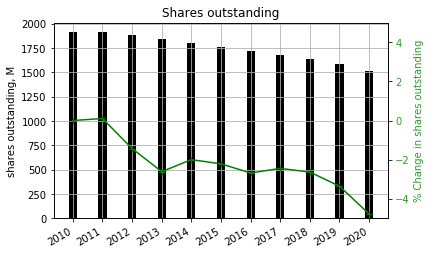

In [265]:
# calculate the percent change in shares outstanding, pcso
pcso = np.zeros(len(df_dcf_data['shares_outstanding'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['shares_outstanding'].to_numpy()[0:-1])):
    pcso[i+1] = ((df_dcf_data['shares_outstanding'].to_numpy()[i+1] - df_dcf_data['shares_outstanding'].to_numpy()[i])/
                df_dcf_data['shares_outstanding'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('shares outstanding, M')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['shares_outstanding']/1e6, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcso,'+-g')
    
ax2.set_ylabel('% Change in shares outstanding',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-5,5))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Shares outstanding')
plt.show()

In [266]:
print('average shares outstanding growth rate: {:.2f}%'.format(pcso[1:].mean()))

average shares outstanding growth rate: -2.40%


**Observation:**  
From the Consolidated Income Sheet, average shares outstanding have been declining at an average rate -2.4%.

### 10 year treasury bond yield <a id="section6-12"></a>
The [10 year treasury yield](https://finance.yahoo.com/quote/%5ETNX?p=^TNX&.tsrc=fin-srch) is used as a measure of the risk free rate.   

In [267]:
tby = 1.38/100             # 10 year treasury bond yield
print('10 year treasury bond yield: {:,.2f}%'.format(tby*100))

10 year treasury bond yield: 1.38%


### Bond yield spread to treasury <a id="section6-13"></a>
The spread to treasury implies that all corporate debt will have a higher yield than yields associated with comparable maturity US Treasury Bonds.  The best way to determine default risk is to see how a particular company's debt is trading in the market and compare it on a spread basis with comparable maturity yields.  

Look at [PIMCO Active Bond Exchange-Traded Fund (BOND)](https://finance.yahoo.com/quote/BOND?p=BOND) or use a default rating systems that are published by the three major rating agencies, Standards and Poors Corp, Moody’s Investor Services and Fitch & Company.

Web resources:
- http://www.standardpoor.com/  
- http://bond.yahoo.com/rates.html  
- http://www.moodys.com/cust/default.asp  
- http://www.fitchibca.com/corporate/index.cfm  

In [268]:
bystt = (2.53-1.38)/100           # bond yield spread to treasury spread
print('Bond yield spread to treasury: {:,.2f}%'.format(bystt*100))

Bond yield spread to treasury: 1.15%


### Preferred stock yield <a id="section6-14"></a>
Amount of preferred stock outstanding from the most recent balance sheet of the company. From the balance sheet, the preferred stock is \\$5.983 billion.

In [269]:
psy = 5/100  # preferred stock yield
print('preferred stock yield: {:,.2f}%'.format(psy*100))

vps = 5983000000 # value of preferred stock
print('value of preferred stock: ${:,.2f}B'.format(vps/1e9))

preferred stock yield: 5.00%
value of preferred stock: $5.98B


### Equity risk premium <a id="section6-15"></a>
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The equity risk premium has been going down over the years.  
- 1926 to 1990: 5.5%   
- 1962 to 1990: 3.25%   
- 1981 to 1990: 0.19%   

In times of sustained economic growth the risk premium demanded by investors generally declines.   

I'm going to use 3% as the equity risk premium.

In [270]:
eq_rp = 3.0/100             # equity risk premium
print('Equity risk premium: {:,.2f}%'.format(eq_rp*100))

Equity risk premium: 3.00%


### Company specific beta <a id="section6-16"></a>
The Beta used is Beta of Equity. Beta is the monthly price change of a particular company relative to the monthly price change of the S&P 500. The time period for Beta is 5 years when available. This value can be obtained at [yahoo finance](https://finance.yahoo.com/quote/ED/?p=ED).  

A measure of risk of an individual stock. It measures volatility of return - a higher beta means a higher risk. A financial model that uses Beta as its sole measure of risk (signal factor model) is called a Capital Asset Pricing Model (CAPM).
 

In [271]:
beta = 1.15 # company specific beta
print('Company specific beta: {:,.2f}'.format(beta))

Company specific beta: 1.15


### DCF model inputs <a id="section6-17"></a>
Below are the DCF model inputs.  These values were calculated above.

In [272]:
# various rates
rgr = rgr_avg              # revenue growth rate
print('revenue growth rate: {:,.2f}%'.format(rgr*100))
nopm = nopm_avg             # net operating profit margin
print('net operating profit margin: {:,.2f}%'.format(nopm*100))
tr = tax_rate_avg               # tax rate
print('tax rate: {:,.2f}%'.format(tr*100))
dr = depreciation_rate_avg              # depreciation rate (% of revenue)
print('depreciation rate: {:,.2f}%'.format(dr*100))
ir = investment_rate_avg              # investment rate (% of revenue)
print('investment rate: {:,.2f}%'.format(ir*100))
wcr = working_capital_rate_avg            # working capital rate (% of revenue)
print('working capital rate: {:,.2f}%'.format(wcr*100))

revenue growth rate: 1.69%
net operating profit margin: 38.72%
tax rate: 23.23%
depreciation rate: 1.32%
investment rate: 8.78%
working capital rate: 0.00%


In [273]:
# General Inputs
fy_start = df_dcf_data['FY'].iloc[-1].year # fiscal year to start excess return period
erp = 10                  # excess return period, years
rev_start = df_dcf_data['revenue'].to_numpy()[-1] # starting revenues for excess return period
print('starting revenues: ${:,.2f}B'.format(rev_start/1e9))
print('shares outstanding: {:,.0f}'.format(so))

starting revenues: $25.24B
shares outstanding: 1,509,000,000


In [274]:
ps_mv = vps               # preferred stock, market value 
print('preferred stock, market value : ${:,.2f}B'.format(ps_mv/1e9))
cs_mv = csp*so            # common stock, market value 
print('common stock, market value: ${:,.2f}B'.format(cs_mv/1e9))

preferred stock, market value : $5.98B
common stock, market value: $92.94B


**Long Term Debt, Market Value, ltd_mv**  
Use the book value for long term debt.  Various online resources can be used to research this item.
These include, [Bondsonline](http://www.bondsonline.com/) and [Bloomberg](http://www.bloomberg.com/).  The book value of debt and preferred stock is an accounting measure that relates to how much money was raised by the company when each security was issued.  The market value of debt and the preferred and common stock is the price that specific obligations would trade at in today’s market. 

Long term debt for firms can take one of two forms.  It can be a long-term loan from a bank or other financial institution or it can be a long-term bond issued to financial markets, in which case the creditors are the investors in the bond.  Firms often have long term obligations that are not captured in the long term debt item.  These include obligations to lessors on assets that firms have leased, to employees in the form of pension fund and health care benefits yet to be paid, and to the government in the form of taxes deferred.  In the last two decades, accountants have increasingly moved towards quantifying these liabilities and showing them as long term liabilities.

In [275]:
ltd_mv = vod              # market value of long term debt
tmv = ltd_mv+ps_mv+cs_mv  # total market value 
print('total market value: ${:,.2f}B'.format(tmv/1e9))

total market value: $98.92B


**Cost of Common Equity, cce**  
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The annual rate of return that an investor expects to earn when investing in shares of a company is known as the cost of common equity.  It includes dividends and increases in the market value.

In [276]:
cce = tby+beta*eq_rp      # cost of common equity or the expected return for the stock
print('cost of common equity: {:,.2f}%'.format(cce*100))

cost of common equity: 4.83%


**Long Term Debt, Average Yield, ltd_ay**  
The total cost of long term debt.

In [277]:
ltd_ay = tby+bystt        # long term debt average yield
print('long term debt average yield: {:,.2f}%'.format(ltd_ay*100))

long term debt average yield: 2.53%


**Long Term Debt, After Tax Yield, ltd_aty**  
The tax benefits of long term debt.  Interest payments are tax deductible for the company.

In [278]:
ltd_aty = ltd_ay*(1-tr)   # long term debt after tax yield
print('long term debt after tax yield: {:,.2f}%'.format(ltd_aty*100))

ltd_pc = vod/tmv          # weight for long term debt 
ltd_ate = ltd_aty*ltd_pc  # after tax effect of long term debt 
ps_ay = psy               # preferred stock, average yield 
ps_aty = ps_ay            # preferred stock, average yield 
print('preferred stock, average yield: {:,.2f}%'.format(ps_aty*100))

ps_pc = ps_mv/tmv         # preferred stock, % capital 
ps_ate = ps_aty*ps_pc     # preferred stock, after tax effect 
cs_ay = cce               # common stock, average yield 
cs_aty = cce              # common stock, after tax yield 
print('common stock, after tax yield: {:,.2f}%'.format(cs_aty*100))

cs_pc = cs_mv/tmv         # common stock, % capital 
cs_ate = cs_aty*cs_pc     # common stock, after tax effect 
print('common stock, after tax effet: {:,.2f}%'.format(cs_ate*100))

tate = ltd_ate+ps_ate+cs_ate # total after tax effect 
print('total after tax effect: {:,.2f}%'.format(tate*100))
tpc = ltd_pc+ps_pc+cs_pc     # total % Capital
print('total % Capital: {:,.2f}%'.format(tpc*100))

long term debt after tax yield: 1.94%
preferred stock, average yield: 5.00%
common stock, after tax yield: 4.83%
common stock, after tax effet: 4.54%
total after tax effect: 4.84%
total % Capital: 100.00%


**Weighted average cost of capital**  
A company's weighted average cost of capital (WACC) is the weighted average of the company's current cost of debt and equity calculated by using current debt, preferred stock and common stock market values.  The WACC of the company, calculated after tax, is the discount rate used in the DCF valuation procedures. The WACC, which is the cost of the different components of financing used by the firm, weighted by their market value proportions.  These include debt, preferred stock, and common stock.

WACC: Weighted Average Cost of Capital, the rate used to discount cash flows, based on the following three factors.
1. Base rate of return.
2. Expected return based on debt and preferred stock.
3. Expected return on common stock and Beta.

All adjusted for the tax advantage of interest payments and the percentage of debt, preferred stock and common stock.

In [279]:
wacc = tate
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

weighted average cost of capital: 4.8%


### Future cash flows <a id="section6-18"></a>
The future cash flows to the firm are projected based on revenue growth.  The cash flows are then discounted using the WACC and the ISV is calculated.

In [280]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

nop = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    nop[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = nop[i]*tr # net operating profit adjusted for taxes
    nopat[i] = nop[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('Year','Rev','NOP','AdjTaxes',
    'NOPAT','Invest.','Deprec.','dInvest.','dWC','FCFF','DF','DF*FCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,nop[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

Year       Rev       NOP  AdjTaxes     NOPAT   Invest.   Deprec.  dInvest.       dWC      FCFF        DF   DF*FCFF
2020    25,241         0         0         0         0         0         0         0         0    0.0000         0
2021    25,669     9,939     2,309     7,630     2,254       338     1,916         0     5,714    0.9538     5,450
2022    26,104    10,107     2,348     7,759     2,292       344     1,948         0     5,811    0.9098     5,287
2023    26,546    10,279     2,388     7,891     2,331       349     1,981         0     5,909    0.8678     5,128
2024    26,996    10,453     2,428     8,025     2,370       355     2,015         0     6,009    0.8277     4,974
2025    27,453    10,630     2,469     8,161     2,410       361     2,049         0     6,111    0.7895     4,825
2026    27,919    10,810     2,511     8,299     2,451       367     2,084         0     6,215    0.7531     4,680
2027    28,392    10,993     2,554     8,439     2,493       374     2,119      

In [281]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
print('intrinsic stock value: ${:,.2f}'.format(isv))
print('current stock price: ${:,.2f}'.format(csp))

discounted excess return period FCFF: $47.70B
discounted corporate residual value: $114.30B
total corporate value: $703.13B
total value of common equity: $196.97B
intrinsic stock value: $130.53
current stock price: $61.59


**Observations:**  
The base line DCF analysis produces an intrinsic stock value of \\$130.

### List of all inputs to the DCF model

In [282]:
print('excess return period: {:,.0f} years'.format(erp))
print('starting revenues: ${:,.3f}B'.format(rev_start/1e9))

# various inputs
print('Current assets: ${:.3f}B'.format(sta/1e9))
print('Current liabilities: ${:.3f}B'.format(stl/1e9))
print('Total long term debt and other: ${:.3f}B'.format(vod/1e9))
print('current stock price: ${:,.2f}'.format(csp))
print('shares outstanding, basic: {:,.0f}M'.format(so/1e6))
print('10 year treasury bond yield: {:,.2f}%'.format(tby*100))
print('Bond yield spread to treasury: {:,.2f}%'.format(bystt*100))
print('preferred stock yield: {:,.2f}%'.format(psy*100))
print('value of preferred stock: {:,.3f}B'.format(vps/1e9))
print('Equity risk premium: {:,.2f}%'.format(eq_rp*100))
print('Company specific beta: {:,.2f}'.format(beta))

# various rates
print('revenue growth rate: {:,.3f}%'.format(rgr*100))
print('net operating profit margin: {:,.3f}%'.format(nopm*100))
print('tax rate: {:,.3f}%'.format(tr*100))
print('depreciation rate: {:,.3f}%'.format(dr*100))
print('investment rate: {:,.3f}%'.format(ir*100))
print('working capital rate: {:,.3f}%'.format(wcr*100))

# General Inputs
print('starting revenues: ${:,.2f}B'.format(rev_start/1e9))
print('preferred stock, market value : ${:,.2f}B'.format(ps_mv/1e9))
print('common stock, market value: ${:,.2f}B'.format(cs_mv/1e9))
print('total market value: ${:,.2f}B'.format(tmv/1e9))
print('cost of common equity: {:,.2f}%'.format(cce*100))
print('long term debt average yield: {:,.2f}%'.format(ltd_ay*100))
print('long term debt after tax yield: {:,.2f}%'.format(ltd_aty*100))
print('preferred stock, average yield: {:,.2f}%'.format(ps_aty*100))
print('common stock, after tax yield: {:,.2f}%'.format(cs_aty*100))
print('common stock, after tax effect: {:,.2f}%'.format(cs_ate*100))
print('total after tax effect: {:,.2f}%'.format(tate*100))
print('total % Capital: {:,.2f}%'.format(tpc*100))
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

excess return period: 10 years
starting revenues: $25.241B
Current assets: $541.123B
Current liabilities: $500.180B
Total long term debt and other: $0.000B
current stock price: $61.59
shares outstanding, basic: 1,509M
10 year treasury bond yield: 1.38%
Bond yield spread to treasury: 1.15%
preferred stock yield: 5.00%
value of preferred stock: 5.983B
Equity risk premium: 3.00%
Company specific beta: 1.15
revenue growth rate: 1.695%
net operating profit margin: 38.720%
tax rate: 23.231%
depreciation rate: 1.316%
investment rate: 8.780%
working capital rate: 0.000%
starting revenues: $25.24B
preferred stock, market value : $5.98B
common stock, market value: $92.94B
total market value: $98.92B
cost of common equity: 4.83%
long term debt average yield: 2.53%
long term debt after tax yield: 1.94%
preferred stock, average yield: 5.00%
common stock, after tax yield: 4.83%
common stock, after tax effect: 4.54%
total after tax effect: 4.84%
total % Capital: 100.00%
weighted average cost of capit

## 7) DCF Scenarios <a id="section7"></a>
Adjusting the weighted average cost of capital to 8.0% to reflect possible higher interest and inflation in the future and changing the revenue growth rate to a modest 1%.

In [283]:
wacc = 0.08 # weighted average cost of capital
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

rgr = 0.01  # revenue growth rate
print('revenue growth rate: {:,.2f}%'.format(rgr*100))

weighted average cost of capital: 8.0%
revenue growth rate: 1.00%


In [284]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

nop = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    nop[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = nop[i]*tr # net operating profit adjusted for taxes
    nopat[i] = nop[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('Year','Rev','NOP','AdjTaxes',
    'NOPAT','Invest.','Deprec.','dInvest.','dWC','FCFF','DF','DF*FCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,nop[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

Year       Rev       NOP  AdjTaxes     NOPAT   Invest.   Deprec.  dInvest.       dWC      FCFF        DF   DF*FCFF
2020    25,241         0         0         0         0         0         0         0         0    0.0000         0
2021    25,493     9,871     2,293     7,578     2,238       335     1,903         0     5,675    0.9259     5,255
2022    25,748     9,970     2,316     7,654     2,261       339     1,922         0     5,732    0.8573     4,914
2023    26,006    10,070     2,339     7,730     2,283       342     1,941         0     5,789    0.7938     4,596
2024    26,266    10,170     2,363     7,808     2,306       346     1,961         0     5,847    0.7350     4,298
2025    26,529    10,272     2,386     7,886     2,329       349     1,980         0     5,905    0.6806     4,019
2026    26,794    10,375     2,410     7,964     2,353       353     2,000         0     5,964    0.6302     3,759
2027    27,062    10,478     2,434     8,044     2,376       356     2,020      

In [285]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
print('intrinsic stock value: ${:,.2f}'.format(isv))

discounted excess return period FCFF: $39.59B
discounted corporate residual value: $47.99B
total corporate value: $628.70B
total value of common equity: $122.54B
intrinsic stock value: $81.20


The DCF model calculates with adjustments an intrinsic stock value of \\$81.

### 8) Dividend Discount Model <a id="section8"></a>
In this section I look at the dividends paid as a series of cash flows. The historical dividends are plotted below and the average growth in dividend payments are calculated.    

Since a dividend stock is primarily purchased for the stream of dividends, the present value and internal rate of return of the cash flows can be calculated. 

In [286]:
#column names: fiscal years 
years_list = df_metrics.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

In [287]:
#line 8: Dividends per share  
dps = df_metrics.iloc[8].to_numpy()[1:].astype('float')[::-1]

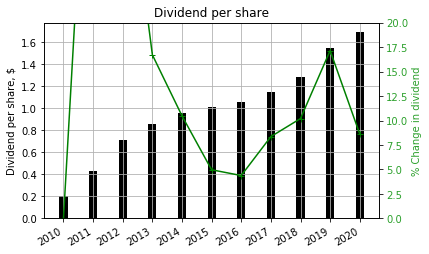

In [288]:
# calculate the percent change in dividends
pcd = np.zeros(len(dps)) # percent change in dividend
for i in range(len(dps[0:-1])):
    pcd[i+1] = ((dps[i+1] - dps[i])/
                dps[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dividend per share, $')

# plot revenue as single bar
plt.bar(year_ended_list,dps, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(year_ended_list,pcd,'+-g')
    
ax2.set_ylabel('% Change in dividend',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Dividend per share')
plt.show()

In [289]:
adgr = pcd[-6:].mean() #last 6 years
print('average dividend growth rate: {:.2f}%'.format(adgr))

average dividend growth rate: 8.95%


### Future dividend estimate
Using the average dividend growth rate calculated above, a series of estimated future dividend payments are generated. 

In [290]:
#adgr = 1/100 # changing the dividend growth rate to 1%

fdp = np.zeros(len(dps)) # future dividend payments
fdp[0] = dps[-1]
for i in range(len(dps[0:-1])):
    fdp[i+1] = fdp[i]+fdp[i]*adgr/100

### Net Present Value (NPV) calculation
Using the series of estimated future dividend payments and including the stock purchase price and the final sale price, the NPV is calculated using the discount rate. In the case when all future cash flows are positive, the only outflow of cash is the purchase price, the NPV is simply the PV of future cash flows minus the purchase price.

The estimated price range in 10 years: 62.71 to 83.74.  This was determined by the NAIC SSG and setting the number of years to ten.

In [291]:
print('current stock price: ${:,.2f}'.format(csp))

fsp = (62.71 + 83.74)/2 # final stock price, $
print('final stock price: ${:,.2f}'.format(fsp))

current stock price: $61.59
final stock price: $73.22


In [292]:
est_cf = np.copy(fdp) # make a copy of the estimated cash flow

# cash flows, initial purchase, dividend payments and final sale
est_cf[0] = est_cf[0] - csp # subtract purchase price from the first dividend payment
est_cf[-1] = est_cf[-1] + fsp # include the sale price with the final dividend payment

The discount rate used in the NPV calculation is the rate of return that I would currently expect for a safe investment such as an investment grade corporate bond. This can be the current rate or an estimated future rate.  

In [293]:
dr = 3/100 # discount rate
print('net present value of cash flows: ${:.2f}'.format(np.npv(dr, est_cf)))

net present value of cash flows: $17.92


Since the NPV is greater than zero, this would indicate that the stock and future dividends is trading below the fair price.

### Internal Rate of Return (IRR) calculations
The internal rate of return (IRR) is the discount rate that makes the net present value (NPV) of all cash flows equal to zero in a discounted cash flow analysis. Generally speaking, the higher an internal rate of return, the more desirable an investment is to undertake.

As explained above, the stock price has not changed by much over the years, even though the revenue and dividends have been increasing. The final stock price is set equal to the current price.

In [294]:
print('IRR: {:.2f}%'.format(np.irr(est_cf)*100))

IRR: 6.15%


According to global investment bank Goldman Sachs, 10-year stock market returns have averaged 9.2% over the past 140 years. and according to [10-Year Annualized Rolling Returns](https://static.fmgsuite.com/media/documents/bc618705-6161-4c00-be7f-c667c90c61b5.pdf), the long term average is about 10%. However there are many years where the rolling 10 year average return is below 4%.

The calculated IRR is 6%, which is a decent return and significantly higher than current interest rates.  

### The Gordon Growth Model
The Gordon growth model can be used to value a firm that is in 'steady state' with dividends growing at a rate that can be sustained forever. Using a more conservative dividend growth rate, the value of the stock is calculated. 

In [295]:
# The Gordon Growth Model
ke = 4/100 # Required rate of return for equity investors
g = 2/100 # Growth rate in dividends forever
DPS1 = dps[-1] + dps[-1]*g # Expected Dividends one year from now (next period)
print('value of the stock: ${:.2f}'.format(DPS1/(ke-g)))

value of the stock: $86.25


**Observations:**  
The Gordon growth model values the stock above the current price.

## 9) Value analysis  <a id="section9"></a>
The following analysis follows the Warren Buffett strategy as outlined in [3].  This strategy is essentially value investing where companies are chosen that meet a set of criteria and who's stock price is below the intrinsic value plus a margin of safety.  These investments are usually held for the long term.  

Outline:   
- [Business metrics](#section9-1)
 - simple and understandable
 - favorable long term prospects
- [Management metrics](#section9-2)
 - consistent operating history
 - candor
 - rationality: focus on core aspects, only invest in high ROE businesses, focus on shareholder equity
- [Financial metrics](#section9-3)
 - Dividend yield  
 - Payout ratio  
 - Return on equity  
 - Return on Assets  
 - Debt to equity  
 - Profit Margin  
 - Safety margin 
 - One dollar premise
- [Market metrics](#section9-4)
 - The price is determined by the market. The value is determined by the analyst.
 - What is the value of the business?
 - Can the business be purchased at a discount to it's value?

### Business metrics <a id="section9-1"></a>

**Simple and understandable**  
The Company’s major lines of business are Corporate and Commercial Banking, Consumer and Business Banking, Wealth Management and Investment Services, Payment Services, and Treasury and Corporate Support.

**Favorable long term prospects**  
Not examined.  

**Commodity Reliance**  
Not examined.  

### Management metrics <a id="section9-2"></a>

**Consistent operating history**  
Return on equity, Return on Assets, Debt to equity and Profit Margin are plotted below. With some variation, these metrics are consistent over the past few years, with the exception of the 2020 on account of the pandemic.
   
**Candor**  
Not examined.

**Rationality**  
Not examined.


Back to [**Contents**](#section0)  


### Financial metrics <a id="section9-3"></a>
The following financial metrics are looked at over the evaluation period.  
- Dividend yield  
- Payout ratio  
- Return on equity  
- Return on Assets  
- Debt to equity  
- Profit Margin  
- Safety margin 
- One dollar premise

**Dividend yield**  
Plot the dividend yield history over the evaluation period.

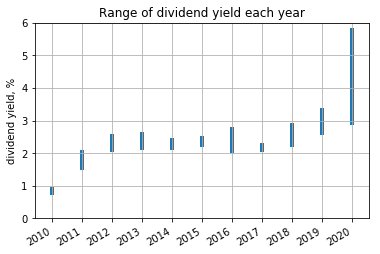

In [296]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

width = 50  # the width of the bars
plt.bar(year_ended_list,(dps/fy_high-dps/fy_low)*100, width,bottom=dps/fy_low*100,label='yield')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((0,6))
plt.title('Range of dividend yield each year')
plt.ylabel('dividend yield, %')
#plt.legend()
plt.grid()

# show plot
plt.show()

The dividend yield has been between 2 and 3 percent from 2012 to 2018.  The stock price has fallen in 2019 and 2020 pushing the dividend yield to a level approaching 6%.

**Payout ratio**  
The payout ratio is plotted using net income and free cash flow (Net cash provided by operating activities).

In [297]:
#line 0: Net income
net_income = df_metrics.iloc[1].to_numpy()[1:].astype('float')[::-1]
# line 3: Free cash flow, Net cash provided by operating activities 
free_cash_flow =  df_metrics.iloc[4].to_numpy()[1:].astype('float')[::-1]
# line 4: Dividends
dividends =  df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

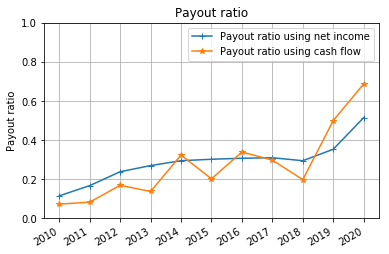

In [298]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Payout ratio')

ax1.plot(year_ended_list,dividends/net_income, '-+',label='Payout ratio using net income')
ax1.plot(year_ended_list,dividends/free_cash_flow, '-*',label='Payout ratio using cash flow')

ax1.tick_params(axis='y')
ax1.set_ylim((0,1))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Payout ratio')
plt.show()

**Observation:** 
As can bee seen in the plot, the payout ratio is increasing over the past two years. This concerning trend is something to watch.  

#### Various ratios: RoE, RoA, PM, D/E
Various ratios can be used to judge management performance. Consistent favorable trends are an indication that management is taking care of the company.

**Return on equity**  
Sometimes return on equity (ROE) is referred to as stockholder's return on investment. It reveals the rate at which shareholders earn income on their shares. Buffett always looks at ROE to see whether a company has consistently performed well compared to other companies in the same industry. ROE is calculated as follows:

$\text{Return on Equity (ROE)} = \frac {\text{Net Income}} {\text{Shareholder's Equity}}$

Looking at the ROE in just the last year isn't enough. The investor should view the ROE from the past five to 10 years to analyze historical performance.

$\text{Shareholders’ Equity} = \text{Total Assets} − \text{Total Liabilities}$    

For this company, this method of getting Shareholders’ Equity gives negative values.  On the Consolidated Balance Sheets, there is a line for Total stockholders’ equity, which is used.

**Return on Assets**   
Return on assets is a profitability ratio that provides how much profit a company is able to generate from its assets. In other words, return on assets (ROA) measures how efficient a company's management is in generating earnings from their economic resources or assets on their balance sheet.

$\text{Return on assets (ROA)} = \frac {\text{Net Income}} {\text{Average Total Assets}}$

Calculating the ROA of a company can be helpful in comparing a company's profitability over multiple quarters and years as well as comparing to similar companies. However, it's important to compare companies of similar size and industry.

For example, banks tend to have a large number of total assets on their books in the form of loans, cash, and investments. A large bank could easily have over \\$2 trillion in assets while putting up a net income that's similar to companies in other industries. Although the bank's net income or profit might be similar to an unrelated company and the bank might have high-quality assets, the bank's ROA will be lower. The larger number of total assets must be divided into the net income, creating a lower ROA for the bank.

Similarly, auto manufacturing requires huge facilities and specialized equipment. A lucrative software company that sells downloadable programs online may generate the same net profits, but it could have a significantly higher ROA than its more asset-heavy counterparts. When utilizing this metric to compare productivity across businesses, it's important to take into account what types of assets are required to function in a given industry, rather than simply comparing the figures.

**Debt to equity**   
The debt-to-equity ratio (D/E) is another key characteristic Buffett considers carefully. Buffett prefers to see a small amount of debt so that earnings growth is being generated from shareholders' equity as opposed to borrowed money. The D/E ratio is calculated as follows:

$\text{Debt-to-Equity Ratio} = \frac {\text{Total Liabilities}} {\text{Shareholders' Equity}}$

This ratio shows the proportion of equity and debt the company uses to finance its assets, and the higher the ratio, the more debt—rather than equity—is financing the company. A high debt level compared to equity can result in volatile earnings and large interest expenses. For a more stringent test, investors sometimes use only long-term debt instead of total liabilities in the calculation above.

**Profit Margin**  
A company's profitability depends not only on having a good profit margin, but also on consistently increasing it. This margin is calculated by dividing net income by net sales. For a good indication of historical profit margins, investors should look back at least five years. A high-profit margin indicates the company is executing its business well, but increasing margins mean management has been extremely efficient and successful at controlling expenses.

$\text{Profit margin} = \frac {\text{net income}} {\text{net sales}}$


In [299]:
#line 0: Total revenue
total_revenue = df_metrics.iloc[0].to_numpy()[1:].astype('float')[::-1]

# line 1: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]

#line 2: Total liabilities
total_liabilities = df_metrics.iloc[3].to_numpy()[1:].astype('float')[::-1]

#line 6: Total assets
total_assets = df_metrics.iloc[6].to_numpy()[1:].astype('float')[::-1]

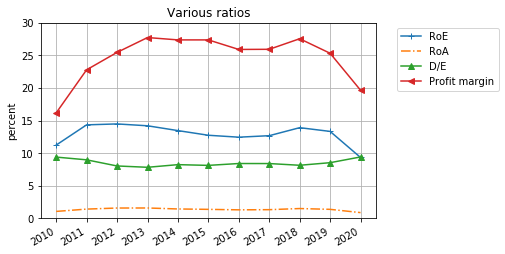

In [300]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')

ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+',label='RoE')
ax1.plot(year_ended_list,net_income/total_assets*100, '-.',label='RoA')
ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-^',label='D/E')
ax1.plot(year_ended_list,net_income/total_revenue*100, '-<',label='Profit margin')

ax1.tick_params(axis='y')
ax1.set_ylim((0,30))
#ax1.legend()
ax1.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Various ratios')
plt.show()

**Observation**  
The trends for RoE, RoA, D/E and profit margin appear stable except for 2020.

**Safety margin**  
A safety margin is the difference between the intrinsic stock value and the market price of the stock.  The margin accounts for uncertainty in the estimations and methods used in the analysis.  The safety margin doesn't always have to be the same number and can vary from company to company.

The stock is trading at or below the various valuation calculations.

**One dollar premise**  
This is a financial test that shows the strength of the business and how well management has rationality allocated to the company's business.

From a company's income, subtract all dividends paid to shareholders.  What is left over is the company's retained earnings.  Now add the company's retained earnings over a 10 year period.  Next determine the difference between the company's current market value and its market value 10 years ago.  If the business has employed retained earnings unproductively over this ten year period, the market eventually catches up and will set a lower price on the business. 

In [301]:
retained_earnings = net_income.sum() - dividends.sum()
print('retained earnings: ${:,.2f}B'.format(retained_earnings/1e9))

retained earnings: $44.03B


The bank has retained earnings of \\$44B over the ten year period.  

In [302]:
# Current market value, share price multiplied by number of shares
cmv_high = df_dcf_data['shares_outstanding'].iloc[-1]*fy_high[-1]
cmv_low = df_dcf_data['shares_outstanding'].iloc[-1]*fy_low[-1]
print('Current market value: ${:,.2f}B to ${:,.2f}B'.format(cmv_low/1e9,cmv_high/1e9))

Current market value: $43.66B to $89.33B


In [303]:
# Past market value, share price multiplied by number of shares
pmv_high = df_dcf_data['shares_outstanding'].iloc[0]*fy_high[0]
pmv_low = df_dcf_data['shares_outstanding'].iloc[0]*fy_low[0]
print('Past market value: ${:,.0f}B to ${:,.0f}B'.format(pmv_low/1e9,pmv_high/1e9))

Past market value: $40B to $54B


In [304]:
print('Difference in market value: ${:,.0f}B to ${:,.0f}B'.format((cmv_low-pmv_low)/1e9,(cmv_high-pmv_high)/1e9))

Difference in market value: $4B to $35B


The difference in market value over the ten year period is \\$17B to \\$66B. So the retained earnings of \\$44B was used to create additional market value of \\$17B to \\$66B. Only on the upper end of the market value does the retained earnings appear to have paid off.

**Plot share price vs EPS**  
Looking at the one dollar premise in terms of share price and EPS.  

The one dollar premise: one dollar of earning should translate into one dollar of market value - this seems the same as a plot of EPS versus share price.

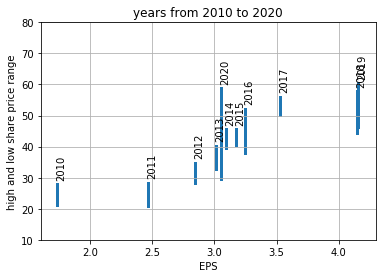

In [305]:
# plotting the eps data points
ax = plt.bar(EPS,fy_high-fy_low,width = .025,bottom=fy_low)
plt.grid()
plt.ylim((10,80))
plt.ylabel('high and low share price range')
plt.xlabel('EPS')
plt.title('years from 2010 to 2020')

rects = ax.patches

# Make some labels.
labels = [year_ended_list[i].strftime("%Y") for i in range(len(year_ended_list))]
for rect, label in zip(rects, labels):
    y_top =  rect.get_y() + rect.get_height()
    plt.text(rect.get_x(), y_top+1, label, rotation=90,va='bottom')    

plt.show()

**Observations:**  
The high and low share price range for each year has been increasing when plotted against EPS (except for 2020).  This indicates that as the company earns more the market is placing a higher value on the company.

### Market metrics <a id="section9-4"></a>
The share price is determined by the market. The value is determined by the analyst. At the time of this analysis, the current stock price is \\$61.59.

The NAIC SSG method estimates the five year price to be in the range of \\$53.41 to \\$71.32. The DCF base line model produces an intrinsic stock value of \\$130. The calculated IRR is 6%, which is a decent return compared to current interest rates. The Gordon Growth Model produces a stock price of \\$86.25.

The current stock price of $61.59 falls within the NAIC range, is below the ISV and in line with the Gordon Growth Model, indicating that the stock is trading at a fair value.

## 10) Peer analysis   <a id="section10"></a>
See the Fidelity report, the company seems to be in the middle of its peers.

## 11) Conclusion  <a id="section11"></a>
Conclusions from each of the sections    
- Quick look:
 - Current news: A review of the financial news sites from [yahoo](https://finance.yahoo.com/quote/USB?p=USB&.tsrc=fin-srch) and [google](https://www.google.com/finance/quote/USB:NYSE) did not reveal any news items to be concerned about.
 - Review quarterly results: Since this analysis mainly looks at the annual reports, a review of the quarterly reports and the most recent 12 months is needed to see if the recent quarterly trends match the yearly trends. [yahoo finance](https://finance.yahoo.com/quote/USB/financials?p=USB) shows TTM Total Revenue is down from 2020, TTM Pretax Income is up from 2020.  The Compustat Company Research from Fidelity (from Sep. 29, 2021) shows quarterly revenue down compared to 2020.
 - Average daily volume:  5,333,353
 - Dividend yield: The current dividend yield is 3%.
- ValuePro: not included
- NACI stock selection guide analysis: Share price is trading in an upward trend over the years 2020 to 2019. Then in 2020 the effects of the pandemic impact revenue. Revenues are increasing, except for 2020 and earnings are increasing. The estimated price range in 5 years: \\$53.41 to \\$71.32.  The current stock price of \\$61.59 falls within this range, indicating that the stock is trading at a fair value.
- Discounted cash flow analysis, base line: intrinsic stock value = \\$130.53
 - DCF Scenarios: Adjusting the weighted average cost of capital to 8.0% to reflect possible higher interest and inflation in the future and changing the revenue growth rate to a modest 1%. The DCF model calculates with adjustments an intrinsic stock value of $81.
- Dividend Discount Model: The average dividend growth rate is 8.95%.
 - Net Present Value (NPV) calculation: The net present value of cash flows: \\$17.92.
 - Internal Rate of Return (IRR) calculation: The IRR is 6.15%.
 - The Gordon Growth Model: The value of the stock is \\$86.25.
- Value analysis: 
 - Dividend yield: The dividend yield has been between 2 and 3 percent from 2012 to 2018. The stock price has fallen in 2019 and 2020 pushing the dividend yield to a level approaching 6%.
 - Payout ratio: The payout ratio is increasing over the past two years. This concerning trend is something to watch.  
 - Various ratios: RoE, RoA, PM, D/E - The trends for RoE, RoA, D/E and profit margin appear stable except for 2020.
 - Safety margin: The stock is trading at or below the various valuation calculations.
 - One dollar premise: The difference in market value over the ten year period is \\$17B to \\$66B. So the retained earnings of \\$44B was used to create additional market value of \\$17B to \\$66B. Only on the upper end of the market value does the retained earnings appear to have paid off.
- Peer analysis: See the Fidelity report, the company seems to be in the middle of its peers.

my concerns: 
- The payout ratio is increasing over the past two years.
- Dividends paid are now at 25% of NOP and the ratio has been increasing over the past ten years. For the years from 2014 to 2018, dividends paid were at 20% of NOP, since then the percentage has been increasing and is a trend to keep an eye on.

Recommendation: Buy - Purchased 35 shares at $55 on 12/1/2021


## 12) Notes  <a id="section12"></a>
The following notes outline the changes to the DCF model for financial and REIT companies.  

**Valuing a REIT**  
Notes from Valuepro Book, page 237  

- NOPM: To calculate operating income take rental revenue and subtracted total real estate expenses and G&A expenses. To arrive at the NOPM divide the adjusted income from real estate by real estate rental revenue. For the REIT, take income from real estate, which includes depreciation and amortization, and subtract GSA. Exclude other income, gains on sale of real estate and interest expenses.
- REIT has no traditional R&D costs

REIT is not taxed at the corporate level, tax rate: should be near zero.

Depreciation and capital expenditures are significantly higher for REITs than in other companies.

New property acquisitions are not directly accounted for in the DCF model for a REIT.

- Working capitol: accounts payable, rents and security deposits
 - Short term assets: cash, rents and other receivables and prepaid expenses
 - Short term liabilities: accounts payable, advance rents security deposits
 
Working capital is almost zero, which is similar to other financial companies.

The consolidated balance sheet lists the assets as: 
- Real estate held for investment, at cost:
 - Land
 - Buildings and improvements
 - Total real estate held for investment, at cost
 - Less accumulated depreciation and amortization
 - Real estate held for investment, net
- Real estate and lease intangibles held for sale, net
- Cash and cash equivalents <- current asset
- Accounts receivable, net <- current asset
- Lease intangible assets, net
- Other assets, net

The line items indicated above have been taken to be the current assets. Intangibles and long term items have been excluded.

The consolidated balance sheet lists the liabilities as: 
- Distributions payable <- current liabilities
- Accounts payable and accrued expenses <- current liabilities
- Lease intangible liabilities, net
- Other liabilities
- Line of credit payable and commercial paper <- current liabilities
- Term loans, net
- Mortgages payable, net <- current liabilities
- Notes payable, net

The line items indicated above have been taken to be the current liabilities.

**Valuing a financial company**  
Notes from Valuepro Book, page 206  

- Total revenue comes from the total interest and dividend income line on the income statement.  The calculation of operating income is more inclusive for a financial company than for an industrial or high tech company.  For financial companies, operating revenue includes all normal revenue items plus interest income, dividends received and other investment income.

- Cost of Goods Sold (CGS) comes from the Total interest expense line on the statement of income. 
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- $\text{Cost of Goods Sold (CGS)} = \text{Total interest expense} + \text{Total non-interest expense}$  
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- Depreciation and amortization of premises and equipment from Consolidated Statements of Cash Flows.  
- Amortization of other acquisition-related intangible assets is not included.

- New investment and Depreciation: Property, plant and equipment expenditures and depreciation charges are significantly lower for a financial company.  A typical manufacturing company, in order to grow its business, invests a significant portion of its revenues in plant, property and equipment (PPE).  Financial companies invest very little in the way of PPE.  However, software, risk management systems and acquisitions of other businesses, need to be included.

From the Consolidated Statements of Cash Flows, under Cash Flows from Investing Activities
- Purchases of premises and equipment
- Purchases of leased equipment, net

- Working capital supports manufacturing and service activities of nonfinancial companies.  For financial companies, their principal liabilities  and assets are financial claims that take the place of working capital.  Because there is no differentiation between current and long term assets and liabilities for a financial company, we adjust working capital charges to zero.  A financial company generally invests all of its funds in other financial assets, which have characteristics of current assets rather than PP&E.  
$\text{Accounts Receivable} = 0$  
$\text{Inventories} = 0$  
$\text{Accounts Payable} = 0$  
$\text{working capital} = 0$ 

- Short term assets:  The balance sheets of most financial companies do not separate assets and liabilities into current and long term categories.  When calculating the short term assets take the total assets and subtract goodwill and intangible assets also subtract other assets of questionable value.  Subtract long term assets such as PP&E from total assets.  

$\text{Short term assets} = \text{Total assets} - \text{good will and others of questionable value} - \text{Premises and equipment}$

- A financial company's principal liabilities are deposits, Federal funds purchased, trading account liabilities, insurance policy and claims reserves, contract holder funds and short term borrowing.  To be consistent with the treatment of interest and an operating expense for financial companies, include long term debt in the short term liability category.  
- Short term liabilities:  Include long term debt.  

$\text{Long term debt} = 0$

This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  This notebook will be used as a template when analyzing other companies.

Dividend: Aristocrat, Achiever & Champion
- Aristocrat: S&P 500 Dividend Aristocrats is designed to measure the performance of S&P 500 index constituents that have followed a policy of consistently increasing dividends every year for at least 25 consecutive years.
- Achiever: The Broad Dividend Achievers Index. Eligible companies must be incorporated in the U.S. or its territories, trade on the NYSE, NASDAQ or AMEX, and have increased its annual regular dividend payments for the last 10 or more consecutive years.
 - https://dividendvaluebuilder.com/dividend-achievers-list/
 - https://www.marketbeat.com/dividends/achievers/
- Champion: This list includes companies that had increased their dividend for at least 25 consecutive years, and includes additional companies that had paid higher dividends without having increased the payout in every calendar year.
 - https://dividendvaluebuilder.com/dividend-champions-list/
 - https://www.dividendgrowthinvestor.com/p/dividend-champions-list.html

## 13) References  <a id="section13"></a>

1. O'Hara, Thomas E., and Ken Janke. Starting and Running a Profitable Investment Club: the Official Guide from the National Association of Investors Corporation. Times Business, 1998. 
2. Gray, Gary, et al. Streetsmart Guide to Valuing a Stock: the Savvy Investors Key to Beating the Market. McGraw-Hill, 2004. 
3. Robert G. Hagstrom, The Warren Buffett Way, Wiley, 2013

## 14) Additional plots <a id="section14"></a>

### Provision for credit losses

In [306]:
# line 9: Provision for credit losses
credit_losses =  df_metrics.iloc[9].to_numpy()[1:].astype('float')[::-1]

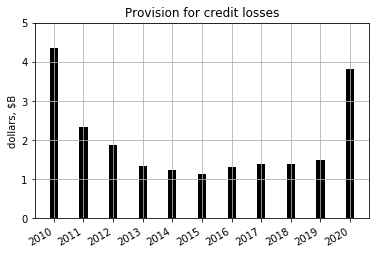

In [307]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

#ax1.plot(year_ended_list,credit_losses/1e9, '-+')
# plot revenue as single bar
ax1.bar(year_ended_list,credit_losses/1e9, width=100,color='k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,5))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Provision for credit losses')
plt.show()

Include this chart in the revenue write up section.

### Book value
Traditionally, a company's book value is its total assets minus intangible assets and liabilities. The book value can also be thought of as the net asset value (NAV) of a company, calculated as its total assets minus intangible assets (patents, goodwill) and liabilities. 

$\text{book value} = \text{total assets} - \text{goodwill and intangibles} - \text{preferred stock} - \text{total liabilities}$

Book value and shareholders' equity are the same, if goodwill and intangibles are included.

In some versions of the calculations, current liabilities have the deposits removed.

In [308]:
# line 12: Preferred stock
preferred_stock =  df_metrics.iloc[12].to_numpy()[1:].astype('float')[::-1]

In [309]:
BV = df_dcf_data['current_assets'] - df_dcf_data['current_liabilities'] - preferred_stock

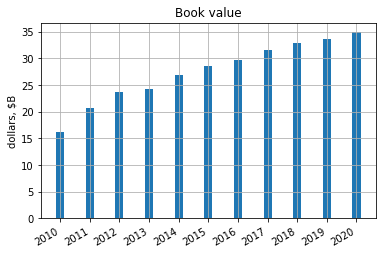

In [310]:
# plot Book value

width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],BV/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Book value')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

### Short term borrowing and Long term debt

On the DFC sheet, Current assets are Total assets with Goodwill and Other intangible assets removed.
Current liabilities are Total liabilities with deposits removed.

On the metrics sheet total assets and total liabilities are the total numbers from the annual report balance sheet.

Researching ideas to tread debt at a bank.  See plots below.
- (Total liabilities)/(total assets): almost steady 1:1
- (LT+ST Debt)/BV ratio 
- (Total liabilities)/BV ratio

Deposits are included in liabilities and are listed as a line item.  Regulations govern reserves the bank must have. So it would seem that deposits could be ignored when looking at debt. A useful ratio would be how long would it take for the banks to pay back Total liabilities less deposits. Two to five years seems reasonable. (Total liabilities less deposits)/(total assets less goodwill and intangibles) also seem like a useful benchmark. It would not make sense to buy a firm whose debt exceeds assets.    


**Notes from Valuation Book, chapter 21**  
In other words, debt is to a bank what steel is to General Motors, something to be molded into other financial products which can then be sold at a higher price and yield a profit. Consequently, capital at financial service firms seems to be more narrowly defined as including only equity capital.

Equity capital is funds paid into a business by investors in exchange for common or preferred stock. This represents the core funding of a business, to which debt funding may be added. Once invested, these funds are at risk, since investors will not be repaid in the event of a corporate liquidation until the claims of all other creditors have first been settled. 

We value firms by discounting expected after tax cash flows prior to debt payments at the weighted average cost of capital. We value equity by discounting cash flows to equity investors at the cost of equity.

Equity can be valued directly, however, by discounting cash flows to equity at the cost of equity. Consequently, we
would argue for the latter approach for financial service firms.

Equity multiples such as price to earnings or price to book ratios are a much better fit for financial service firms than value multiples such as value to EBITDA.

### LT and ST debt
Long term and short term debt are just one part of the total liabilities. Looking at these two items probably does not provide that much useful information.   

In [311]:
# line 10: Long term debt
LT_debt =  df_metrics.iloc[10].to_numpy()[1:].astype('float')[::-1]

# line 11: Short-term borrowing
ST_debt =  df_metrics.iloc[11].to_numpy()[1:].astype('float')[::-1]

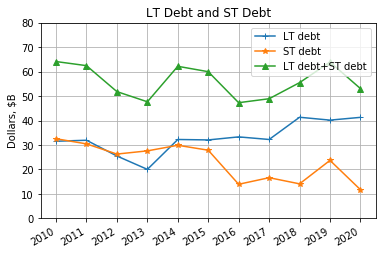

In [312]:
# plot LT Debt and ST Debt
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dollars, $B')

ax1.plot(year_ended_list,LT_debt/1e9, '-+',label='LT debt')
ax1.plot(year_ended_list,ST_debt/1e9, '-*',label='ST debt')
#ax1.plot(year_ended_list,total_liabilities/1e9, '-o',label='total liabilities')
ax1.plot(year_ended_list,(LT_debt+ST_debt)/1e9, '-^',label='LT debt+ST debt')

ax1.tick_params(axis='y')
ax1.set_ylim((0,80))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('LT Debt and ST Debt')
plt.show()

### Total liabilities and Total liabilities less deposits
Need to remove deposits from total liabilities.  The reason being is that reserves on deposits are regulated and the deposits can be withdrawn at any time. 

In [313]:
Liabilities_wo_deposits = df_metrics.iloc[13].to_numpy()[1:].astype('float')[::-1]

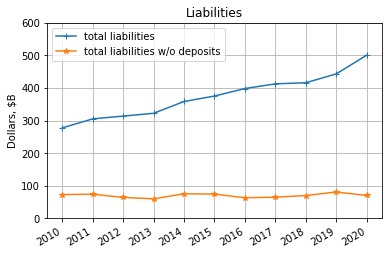

In [314]:
# Total liabilities
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dollars, $B')

#ax1.plot(year_ended_list,LT_debt/1e9, '-+',label='LT debt')
#ax1.plot(year_ended_list,ST_debt/1e9, '-*',label='ST debt')
ax1.plot(year_ended_list,total_liabilities/1e9, '-+',label='total liabilities')
ax1.plot(year_ended_list,Liabilities_wo_deposits/1e9, '-*',label='total liabilities w/o deposits')
#ax1.plot(year_ended_list,df_dcf_data['current_liabilities']/1e9, '-*',label='current liabilities')
#plt.bar(df_dcf_data['FY'],df_dcf_data['current_liabilities']/1e9, width)

#ax1.plot(year_ended_list,(total_liabilities-LT_debt-ST_debt)/1e9, '-o',label='x')

ax1.tick_params(axis='y')
ax1.set_ylim((0,600))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Liabilities')
plt.show()

The plot above indicates that liabilities less deposits have remained stable over the years. It is the deposits that have grown over the years which show up in the balance sheet under liabilities. But deposits are what a bank wants and are part of the business.  
Include this chart in the debt write up section.

### (LT+ST Debt)/BV ratio 
Using this equation as a standin for debt/equity. Probably doesn't provide enough information.

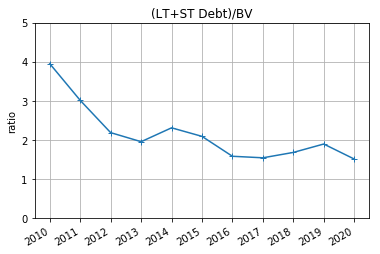

In [315]:
# plot LT+ST Debt/BV ratio 
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

ax1.plot(year_ended_list,(LT_debt+ST_debt)/BV, '-+')

ax1.tick_params(axis='y')
ax1.set_ylim((0,5))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('(LT+ST Debt)/BV')
plt.show()

### (Total liabilities)/BV ratio
Need to remove deposits from liabilities and see what the chart looks like.

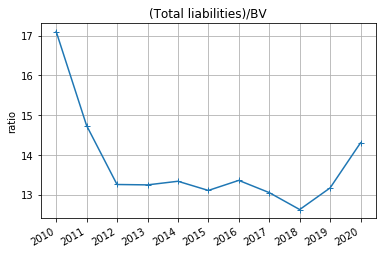

In [316]:
# plot Total liabilities/BV ratio 
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

ax1.plot(year_ended_list,total_liabilities/BV, '-+',label='total liabilities/BV')
#ax1.plot(year_ended_list,df_dcf_data['current_liabilities']/BV, '-*',label='current liabilities/BV')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,2))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('(Total liabilities)/BV')
plt.show()

BV calculation uses current assets and current liabilities, which are modified versions of total liabilities, so current liabilities/BV is more apples to apples. I think this is a better measure of debt load and along with current liabilities divided by NOP.

### (Total liabilities)/(total assets)
Try removing deposits from liabilities.  Goodwill and intangibles are already removed from assets. We want the number to be less than 1.

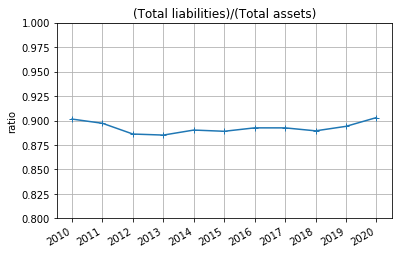

In [317]:
# plot Total liabilities/BV ratio 
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

ax1.plot(year_ended_list,total_liabilities/total_assets, '-+')

ax1.tick_params(axis='y')
ax1.set_ylim((0.8,1))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('(Total liabilities)/(Total assets)')
plt.show()

The ratio of liabilities to assets should not be above one, since this would mean the company owes more than it is worth.  Include this chart in the debt section.

### Combined RoE, RoA, and Profit Margin

In [318]:
# line 2: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]
#line 6: Total assets
total_assets = df_metrics.iloc[6].to_numpy()[1:].astype('float')[::-1]
#line 0: Total revenue
total_revenue = df_metrics.iloc[0].to_numpy()[1:].astype('float')[::-1]

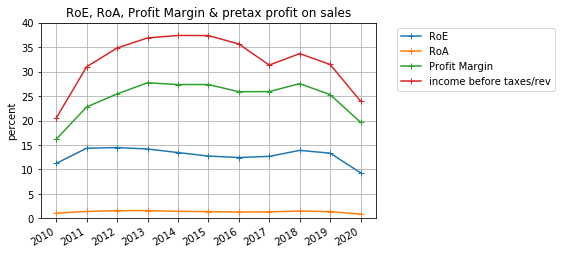

In [319]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')

ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+',label='RoE')
ax1.plot(year_ended_list,net_income/total_assets*100, '-+',label='RoA')
ax1.plot(year_ended_list,net_income/total_revenue*100, '-+',label='Profit Margin')
ax1.plot(year_ended_list,df_dcf_data['income_before_income_taxes']/df_dcf_data['revenue']*100, '-+',
         label='income before taxes/rev')

ax1.tick_params(axis='y')
ax1.set_ylim((0,40))
#ax1.legend()
ax1.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('RoE, RoA, Profit Margin & pretax profit on sales')
plt.show()

### NAIC section 2: Evaluating management
See page 86, figure 9-1.  
- % pretax profit on sales, (net before taxes)/rev
- % earned on equity (another way of saying RoE)

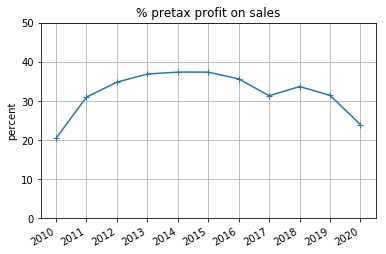

In [320]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')
#ax1.plot(year_ended_list,net_income, '-+',label='net income')
ax1.plot(year_ended_list,df_dcf_data['income_before_income_taxes']/df_dcf_data['revenue']*100, '-+',
         label='income before taxes/rev')
#ax1.plot(year_ended_list,df_dcf_data['revenue'], '-+',label='revenue')
#ax1.plot(year_ended_list,free_cash_flow, '-*',label='free cash flow')

ax1.tick_params(axis='y')
ax1.set_ylim((0,50))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('% pretax profit on sales')
plt.show()

Over the years 2014 to 2020, pretax profit on sales has a downward trend. Ideally this trend should be increasing or at least flat. 

In [321]:
# line 1: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]

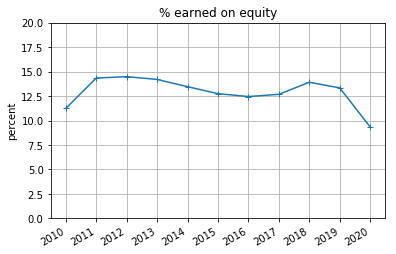

In [322]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')

#ax1.plot(year_ended_list,shareholder_equity/df_dcf_data['revenue']*100, '-+k',
#        label='shareholder equity/rev')
ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+',label='RoE')

ax1.tick_params(axis='y')
ax1.set_ylim((0,20))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('% earned on equity')
plt.show()

Percent earned on equity (another way of saying RoE). Percent earned on equity trend has been flat except for 2020. Percent earned on equity is a measure of financial performance calculated by dividing net income by equity. Because equity is equal to a company’s assets minus its debt, percent earned on equity is considered the return on net assets. Percent earned on equity is considered a gauge of a corporation's profitability and how efficient it is in generating profits.

### NAIC section 3: 5 year estimated EPS, preferred method
See page 87 and figure 10-1, Need the following data:  
- estimate sales in 5 years based on sales growth
- NOPM
- Tax rate
- shares outstanding  

To get future EPS

#### Revenue and least square fit

In [323]:
# get linear fit for eps
y = df_dcf_data['revenue']/1e6
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('revenue slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

revenue slope: 593.31


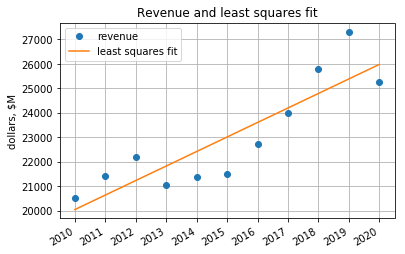

In [324]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $M')

ax1.plot(year_ended_list,df_dcf_data['revenue']/1e6, 'o',label='revenue')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the eps point at five years in the future.

In [325]:
# estimated revenue in 5 years
rev_5yr_est = m*(x[-1]+5) + c
print('estimated rev in 5 years: ${:,.1f}M'.format(rev_5yr_est))

estimated rev in 5 years: $28,946.3M


In [326]:
#pm_eps_5yr_est = rev_5yr_est*nopm_avg*tax_rate_avg*1e6/df_dcf_data['shares_outstanding'].iloc[-1] 
pm_eps_5yr_est = rev_5yr_est*nopm_avg*1e6/df_dcf_data['shares_outstanding'].iloc[-1] 
print('using preferred method: estimated eps in 5 years: ${:.2f}'.format(pm_eps_5yr_est))

using preferred method: estimated eps in 5 years: $7.43


In [327]:
print('using historical eps trend: estimated eps in 5 years: ${:.2f}'.format(eps_5yr_est))

using historical eps trend: estimated eps in 5 years: $4.81


Using the high and low price to earning ratio from above and the projected eps, calculate the range of stock price in five years.

In [328]:
#eps_5yr_est = 5  # user inputed value
print('estimated price range in 5 years: {:.2f} to {:.2f}'.format(eps_5yr_est*pe_avg_low,eps_5yr_est*pe_avg_high))

estimated price range in 5 years: 53.41 to 71.32


The historical EPS and revenue trend both give the same estimated five year EPS and consequently the same range in predicted stock price.

### NOP and net income
Comparing NOP with net income.  These should have the same trend.

In [329]:
#line 0: Net income
net_income = df_metrics.iloc[1].to_numpy()[1:].astype('float')[::-1]
# line 3: Free cash flow, Net cash provided by operating activities 
free_cash_flow =  df_metrics.iloc[4].to_numpy()[1:].astype('float')[::-1]
# line 4: Dividends
dividends =  df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

# NOP = (Revenue - Expenses)
nop = (df_dcf_data['revenue'].to_numpy() - \
    (df_dcf_data['cost_of_goods_sold'].to_numpy() + \
    df_dcf_data['general_and_administrative'].to_numpy() + \
    df_dcf_data['research_and_development'].to_numpy()) )

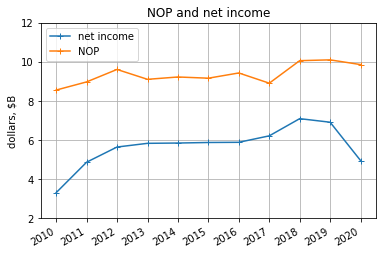

In [330]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

#ax1.plot(year_ended_list,EBITDA/1e6, '-+',label='EBITDA')
ax1.plot(year_ended_list,net_income/1e9, '-+',label='net income')

ax1.plot(year_ended_list,nop/1e9, '-+',label='NOP')
#ax1.plot(year_ended_list,investment/1e6, '-+',label='investment')

ax1.tick_params(axis='y')
ax1.set_ylim((2,12))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('NOP and net income')
plt.show()

As shown in the plot above, NOP and net income have several billion dollars difference. Net income comes from the income statement and NOP is calculated from revenue minus the cost or revenue. Here we are looking for consistency over the years. The decline in net income in 2020 is due to the increase in provision for credit losses.

### Debt and NOP
Comparing D/E and LT debt/NOP.  D/E is the traditional way to look at a company's debt.  Some rules of thumb say that the D/E should not be above 2 or 3.  However the D/E company's typically vary by industry. The ratio of LT debt to NOP gives the number of years it would take the company to pay back debt from NOP, the lower the number the shorter amount of time.

Try removing deposits from liabilities.

In [331]:
#line 2: Total liabilities
total_liabilities = df_metrics.iloc[3].to_numpy()[1:].astype('float')[::-1]
#Liabilities_wo_deposits = df_metrics.iloc[13].to_numpy()[1:].astype('float')[::-1]

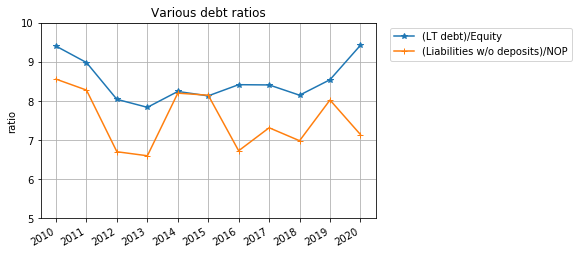

In [332]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

#ax1.plot(year_ended_list,(LT_debt+ST_debt)/nop, '-+',label='(LT+ST debt)/NOP')
ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-*',label='(LT debt)/Equity')
#ax1.plot(year_ended_list,total_liabilities/BV, '-^',label='(total liabilities)/BV')
#ax1.plot(year_ended_list,total_liabilities/nop, '-o',label='(total liabilities)/NOP')
#ax1.plot(year_ended_list,df_dcf_data['current_liabilities']/nop, '-*',label='(current liabilities)/nop')
ax1.plot(year_ended_list,Liabilities_wo_deposits/nop, '-+',label='(Liabilities w/o deposits)/NOP')

ax1.tick_params(axis='y')
ax1.set_ylim((5,10))
#ax1.legend()
ax1.legend(bbox_to_anchor=(1.6, 1))
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Various debt ratios')
plt.show()

The graph above shows the ratios of LT debt equity and liabilities less deposits to NOP. These ratios provide an indication of the level of debt the bank is carrying. We are looking for some consistency over the years and that the level of debt is not outpacing earnings or equity. The ratio of liabilities less deposits to NOP is running about 8 or less, which says that the company can pay back debt with 8 years of NOP. A threshold of ten might be a good level to be concerned about. 

### NOP/shares and EPS
Plotting EPS and NOP/shares should show any differences in the trend.  

In [333]:
#line 1: earnings per share
EPS = df_NAIC_financials.iloc[1].to_numpy()[1:].astype('float')[::-1]

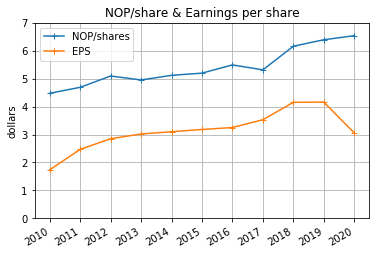

In [334]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars')

ax1.plot(year_ended_list,nop/df_dcf_data['shares_outstanding'], '-+',label='NOP/shares')
plt.plot(year_ended_list,EPS,'+-',label='EPS')

ax1.tick_params(axis='y')
ax1.set_ylim((0,7))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('NOP/share & Earnings per share')
plt.show()

EPS share has been increasing from 2010 to 2018, while during the same period the NOP/share has been consistent. In 2020 the bank increased the provision for loss by several billion dollars which affected EPS. This provision is not included in the NOP. EPS is affected by lots of items in the income statement, but NOP is a more direct calculation, revenue less the cost of revenue.    

### NAIC plot that includes NOP
NOP & Earnings per share is plotted on the SSG NAIC chart.

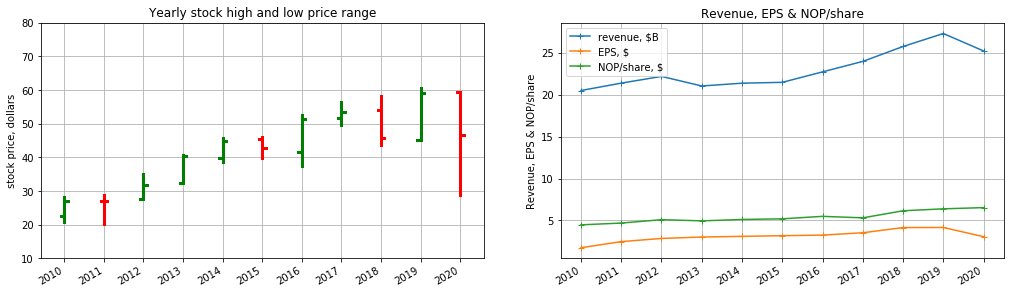

In [335]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# figsize() function to adjust the size
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
width = 3  # the width of the bars
#plt.bar(year_ended_list,fy_high-fy_low, width,bottom=fy_low,label='price')
j = 0
for i in year_ended_list:
    color = 'green'
    if fy_open[j] > fy_close[j]: color= 'red'
    # high/low lines
    plt.plot([i,i],[fy_low[j],fy_high[j]],color=color, linewidth=width)
    # open marker
    plt.plot([i,i-relativedelta(months=1)], [fy_open[j],fy_open[j]], color=color, linewidth=width)
    # close marker
    plt.plot([i,i+relativedelta(months=1)], [fy_close[j],fy_close[j]], color=color, linewidth=width)
    j += 1

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((10,80))
plt.title('Yearly stock high and low price range')
plt.ylabel('stock price, dollars')
#plt.legend()
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

plt.plot(year_ended_list,revenue/1e9,'+-',label='revenue, $B')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')
plt.plot(year_ended_list,nop/df_dcf_data['shares_outstanding'], '-+',label='NOP/share, $')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.yscale('log')
#plt.yticks([0.1,1,10,100,1000,10000],['0.1','1','10','100','1000','10000'])
#plt.ylim((0.1,1000))
plt.title('Revenue, EPS & NOP/share')
plt.ylabel('Revenue, EPS & NOP/share')
plt.legend()

plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()

The yearly stock price is plotted on the left.  The high, low, opening and closing prices are shown.
Revenue, EPS & NOP/share are plotted on the right.  NOP/share and EPS should have the same trend. Except for 2020, then revenue and EPS trend has been increasing. NOP/share has also been increasing every year. 

### Dividends/NOP  
Another way to look at dividend payout and the ability of the company to support dividend payments is to look at the ratio of dividends to NOP. The ratio should be low and less than 25%, since it needs cash to support growth and other business activities.  

In [336]:
dividends = df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

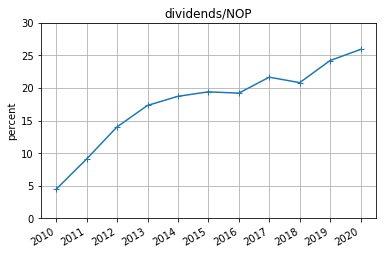

In [337]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')

#ax1.plot(year_ended_list,nop/dividends, '-+',label='NOP/dividends')
ax1.plot(year_ended_list,dividends/nop*100, '-+',label='dividends/NOP')

ax1.tick_params(axis='y')
ax1.set_ylim((0,30))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.title('NOP per dividends')
plt.title('dividends/NOP')
plt.show()

Dividends paid are now at 25% of NOP and the ratio has been increasing over the past ten years. For the years from 2014 to 2018, dividends paid were at 20% of NOP, since then the percentage has been increasing and is a trend to keep an eye on. Put this chart in the report under dividends.